In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, r2_score, f1_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mehdi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Veri seti

In [2]:
df = pd.read_csv(r'C:\data_set\bank_data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Exploratory Data Analysis - EDA

## Veri setine genel bakış

In [3]:
# değişken isimleri kontrol ediliyor
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.columns = df.columns.str.replace(' ', '_')


In [6]:
# 'CustomerId' sütununu kalıcı olarak silindi
df.drop('CustomerId', axis=1, inplace=True)
# 'RowNumber' sütununu kalıcı olarak silindi
df.drop('RowNumber', axis=1, inplace=True)
# 'Surname' sütununu kalıcı olarak silindi
df.drop('Surname', axis=1, inplace=True)

In [7]:
# değişken isimleri kontrol ediliyor
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction_Score', 'Card_Type',
       'Point_Earned'],
      dtype='object')


#### istatistiksel özetler

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


## Eksik gözlem inceleme

In [9]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction_Score    0
Card_Type             0
Point_Earned          0
dtype: int64

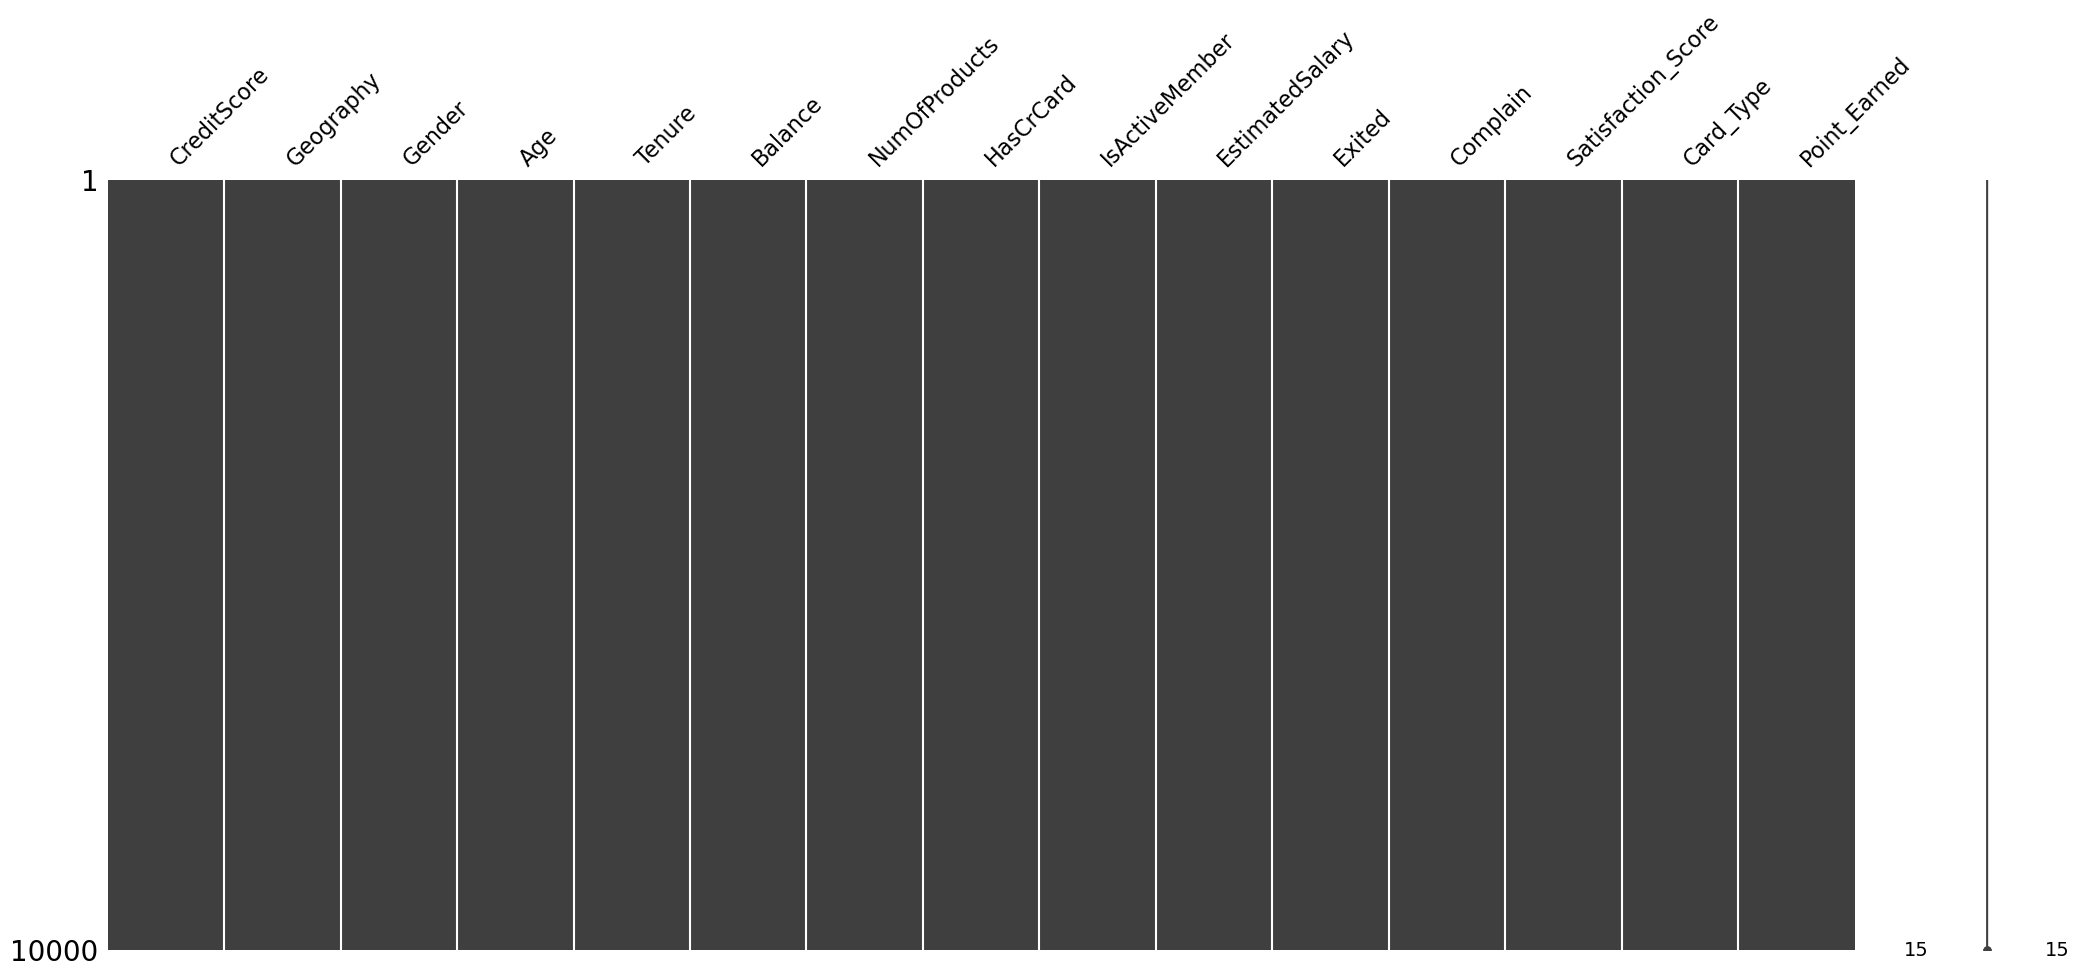

In [10]:
import missingno as msno
# Eksik verilerin görselleştirilmesi
msno.matrix(df)
plt.show()

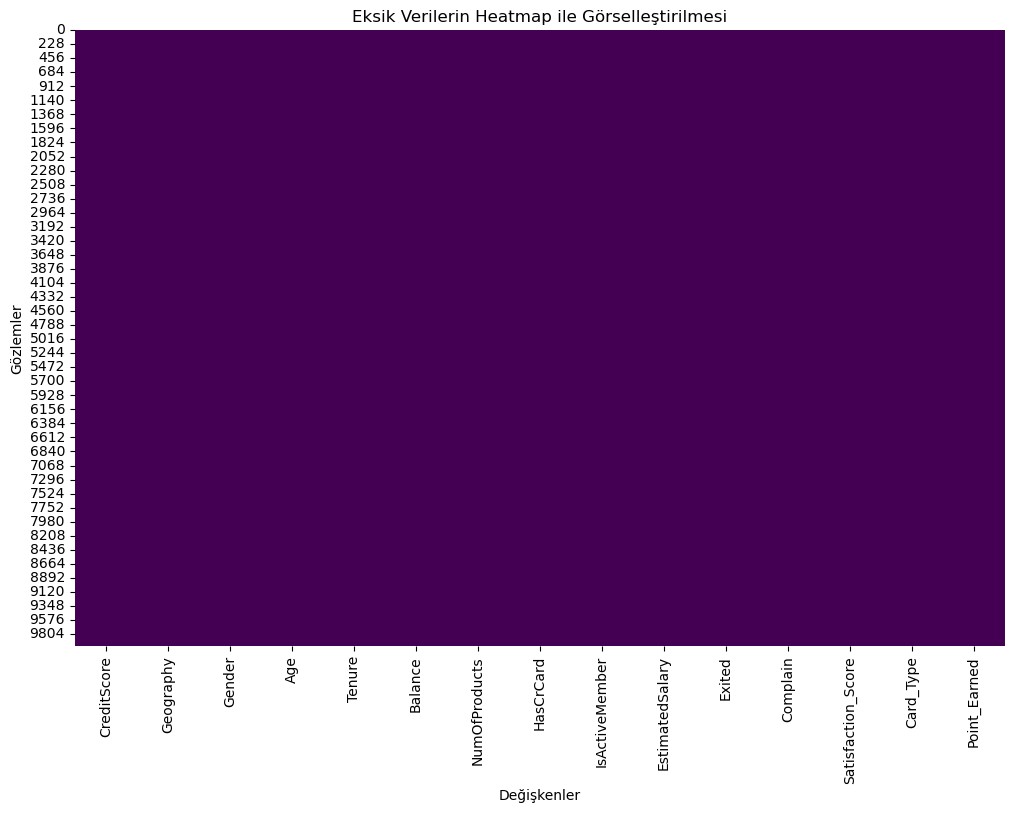

In [11]:
# Eksik verilerin heatmap ile görselleştirilmesi
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Eksik Verilerin Heatmap ile Görselleştirilmesi")
plt.xlabel("Değişkenler")
plt.ylabel("Gözlemler")
plt.show()

## Veri Keşfi

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Sayısal değişkenler

#### Kredi Skoru Dağılımı

C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


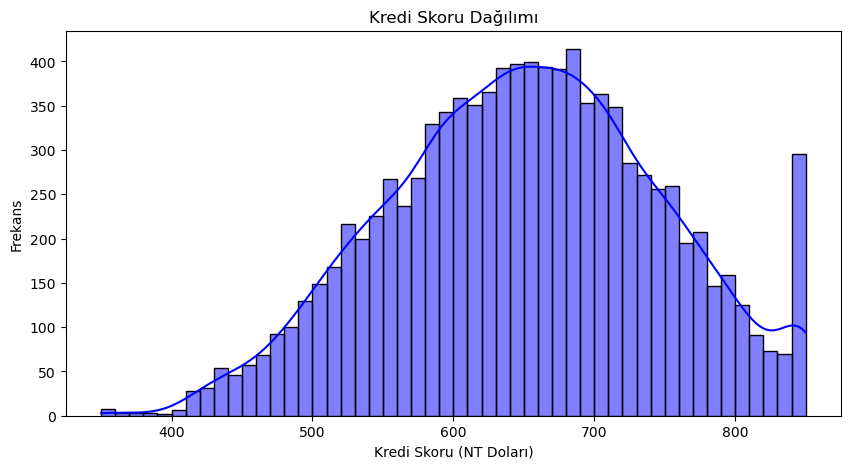

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df["CreditScore"], bins=50, kde=True, color="blue")
plt.title("Kredi Skoru Dağılımı")
plt.xlabel("Kredi Skoru (NT Doları)")
plt.ylabel("Frekans")
plt.show()

#### Yaş (Age) Dağılımı (Histogram)

C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


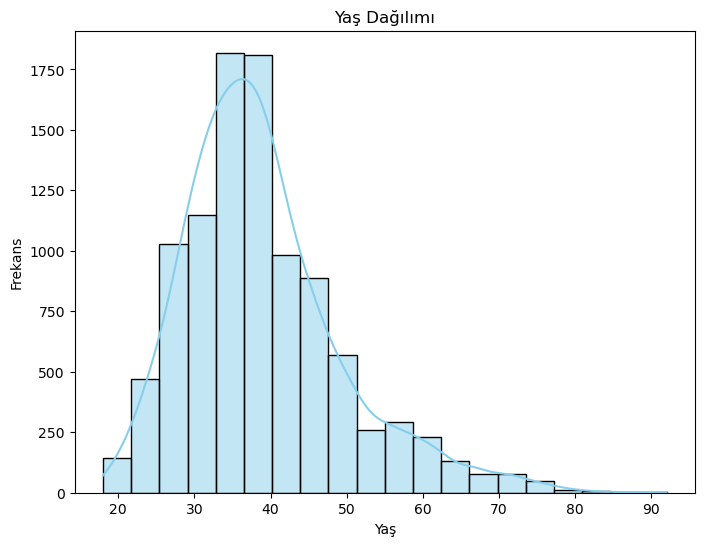

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Age"], kde=True, color="skyblue", bins=20)
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()


##### Bakiye (Balance) Dağılımı (Histogram)

C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


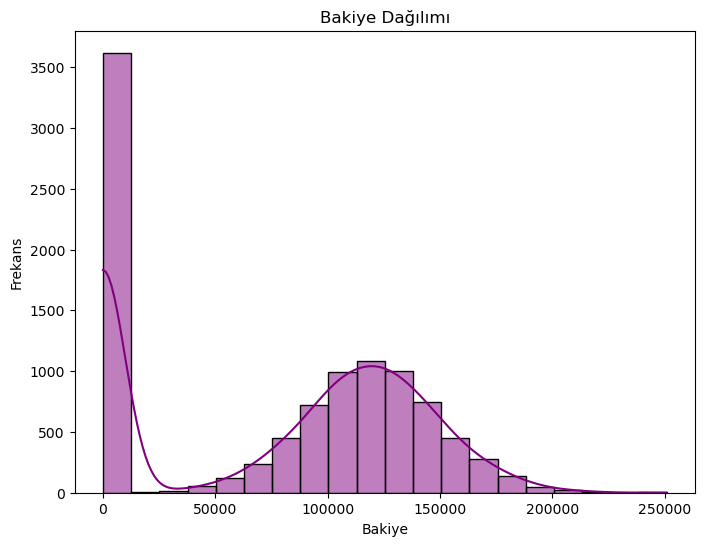

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Balance"], kde=True, color="purple", bins=20)
plt.title("Bakiye Dağılımı")
plt.xlabel("Bakiye")
plt.ylabel("Frekans")
plt.show()


### Point_Earned (Kazanılan Puan) Dağılımı (Histogram)

C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


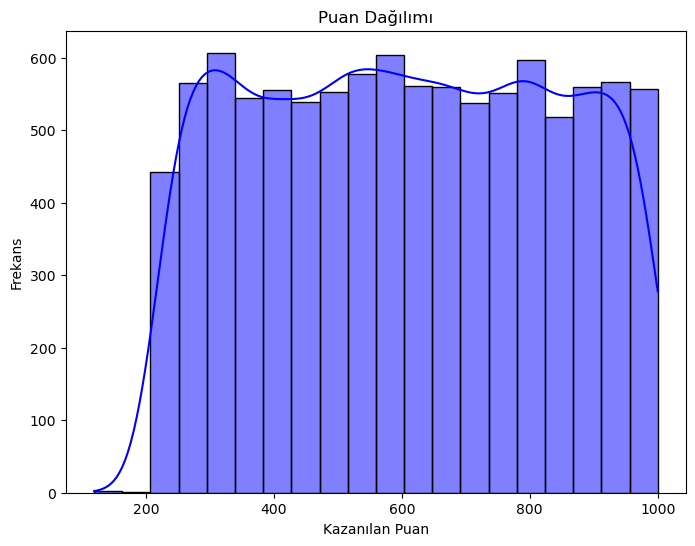

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Point_Earned"], kde=True, color="Blue", bins=20)
plt.title("Puan Dağılımı")
plt.xlabel("Kazanılan Puan")
plt.ylabel("Frekans")
plt.show()


### Kategorik Değişkenler

#### Ürün Sayısı (NumOfProducts) Dağılımı (Bar Plot)

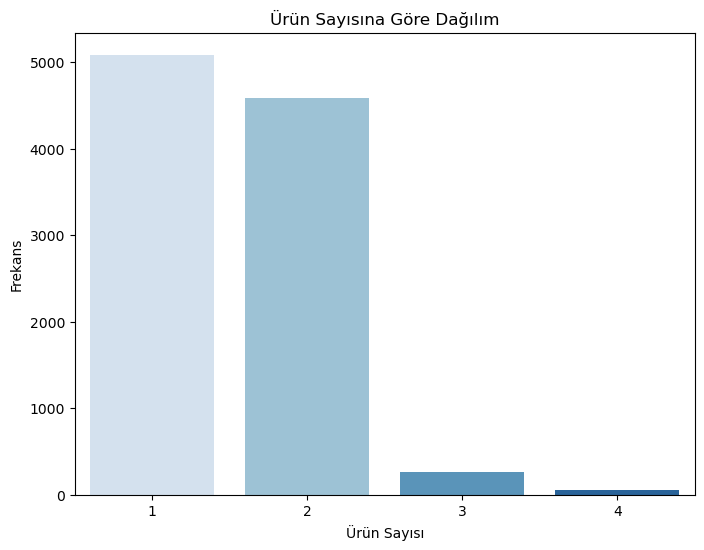

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x="NumOfProducts", data=df, palette="Blues")
plt.title("Ürün Sayısına Göre Dağılım")
plt.xlabel("Ürün Sayısı")
plt.ylabel("Frekans")
plt.show()


#### Cinsiyet (Gender) Pasta grafiği

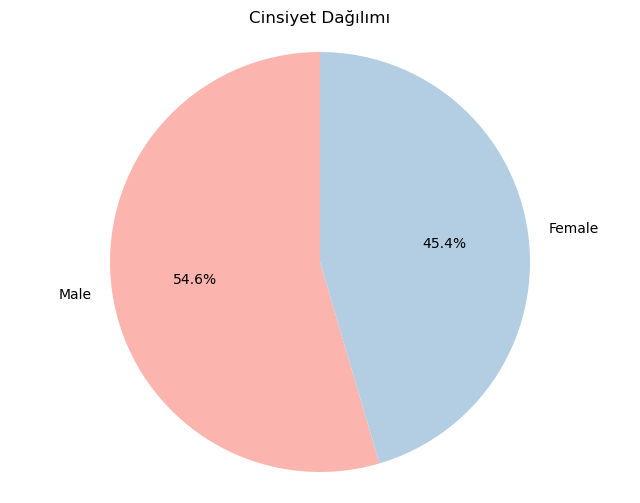

In [18]:
# Cinsiyetlerin frekanslarını al
gender_counts = df["Gender"].value_counts()

# Pasta grafiği çiz
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=plt.cm.Pastel1.colors, startangle=90)
plt.title("Cinsiyet Dağılımı")
plt.axis("equal")  # Daireyi yuvarlak yapmak için
plt.show()

### Coğrafya (Geography) Pasta grafiği

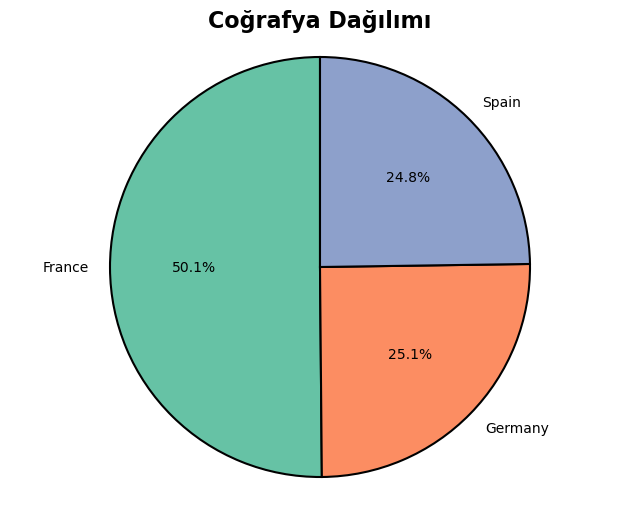

In [19]:
# Coğrafya verisinin frekanslarını al
geography_counts = df["Geography"].value_counts()

# Pasta grafiği çiz
plt.figure(figsize=(8, 6))
plt.pie(geography_counts, labels=geography_counts.index, autopct="%1.1f%%", colors=plt.cm.Set2.colors, startangle=90, 
        wedgeprops={"edgecolor": "black", "linewidth": 1.5, "linestyle": "solid"})
plt.title("Coğrafya Dağılımı", fontsize=16, weight="bold")
plt.axis("equal")  # Daireyi yuvarlak yapmak için
plt.show()

### Kart Türü (Card_Type) Pasta grafiği

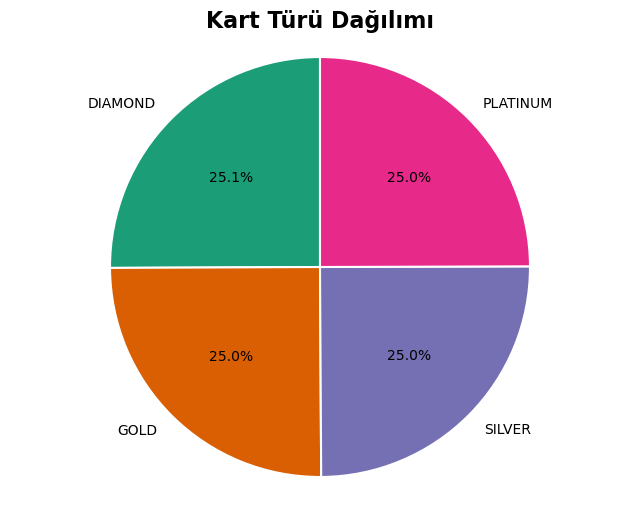

In [20]:
# Card_Type verisinin frekanslarını al
card_type_counts = df["Card_Type"].value_counts()

# Pasta grafiği çiz
plt.figure(figsize=(8, 6))
plt.pie(card_type_counts, labels=card_type_counts.index, autopct="%1.1f%%", colors=plt.cm.Dark2.colors, startangle=90, 
        wedgeprops={"edgecolor": "white", "linewidth": 1.5, "linestyle": "solid"})
plt.title("Kart Türü Dağılımı", fontsize=16, weight="bold")
plt.axis("equal")  # Daireyi yuvarlak yapmak için
plt.show()

### Memnuniyet Skoru (Satisfaction_Score) Pasta grafiği

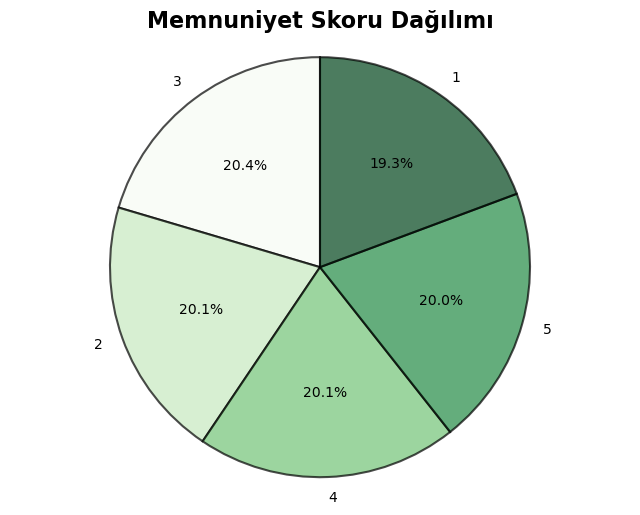

In [21]:
# Satisfaction_Score verisinin frekanslarını al
satisfaction_counts = df["Satisfaction_Score"].value_counts()

# Renk paleti seçimi (ListedColormap kullanarak)
colors = plt.cm.Greens(np.linspace(0, 1, len(satisfaction_counts)))

# Pasta grafiği çiz
plt.figure(figsize=(8, 6))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct="%1.1f%%", colors=colors, startangle=90, 
        wedgeprops={"edgecolor": "black", "linewidth": 1.5, "linestyle": "solid", "alpha": 0.7})
plt.title("Memnuniyet Skoru Dağılımı", fontsize=16, weight="bold")
plt.axis("equal")  # Daireyi yuvarlak yapmak için
plt.show()

### Tenure Dağılımı

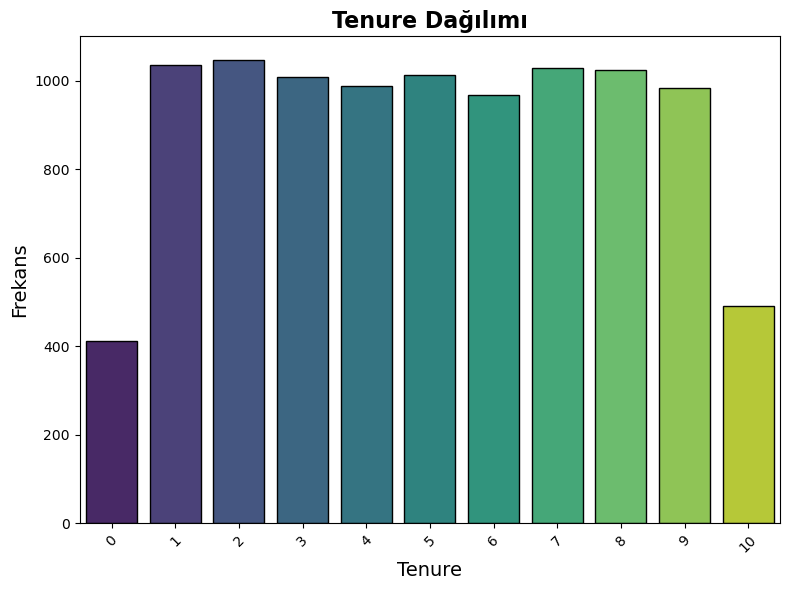

In [22]:
# Tenure değişkeninin frekanslarını al
plt.figure(figsize=(8, 6))
sns.countplot(x="Tenure", data=df, palette="viridis", edgecolor="black")

# Başlık ve etiketleri ekle
plt.title("Tenure Dağılımı", fontsize=16, weight="bold")
plt.xlabel("Tenure", fontsize=14)
plt.ylabel("Frekans", fontsize=14)

# Grafikteki bar'ların kenarlarını netleştir
plt.xticks(rotation=45)  # X eksenindeki etiketleri döndür, daha okunabilir olması için

# Görseli göster
plt.tight_layout()
plt.show()

### NumOfProducts Dağılımı

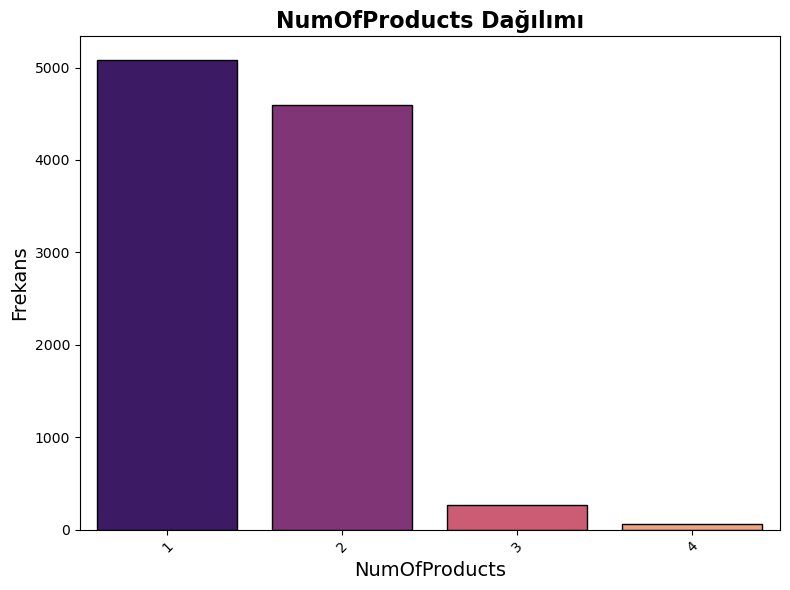

In [23]:
# NumOfProducts değişkeninin frekanslarını al
plt.figure(figsize=(8, 6))
sns.countplot(x="NumOfProducts", data=df, palette="magma", edgecolor="black")

# Başlık ve etiketleri ekle
plt.title("NumOfProducts Dağılımı", fontsize=16, weight="bold")
plt.xlabel("NumOfProducts", fontsize=14)
plt.ylabel("Frekans", fontsize=14)

# Grafikteki bar'ların kenarlarını netleştir
plt.xticks(rotation=45)  # X eksenindeki etiketleri döndür, daha okunabilir olması için

# Görseli göster
plt.tight_layout()
plt.show()

### Veri Hedefle Bağımlılık Analizi

In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


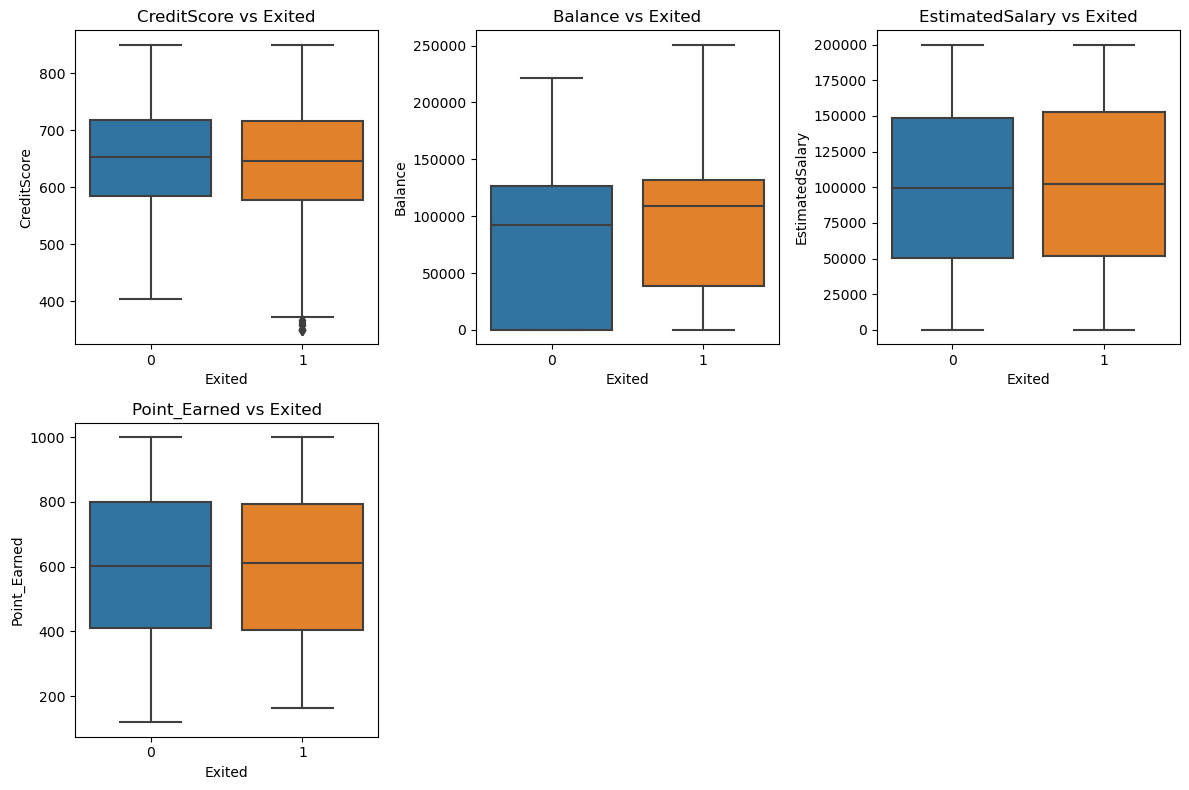

In [25]:
numerical_columns = ['CreditScore','Balance','EstimatedSalary','Point_Earned']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs Exited')
plt.tight_layout()
plt.show()


### Müşteri Ayrılma Durumu(Exited) Dağılımı

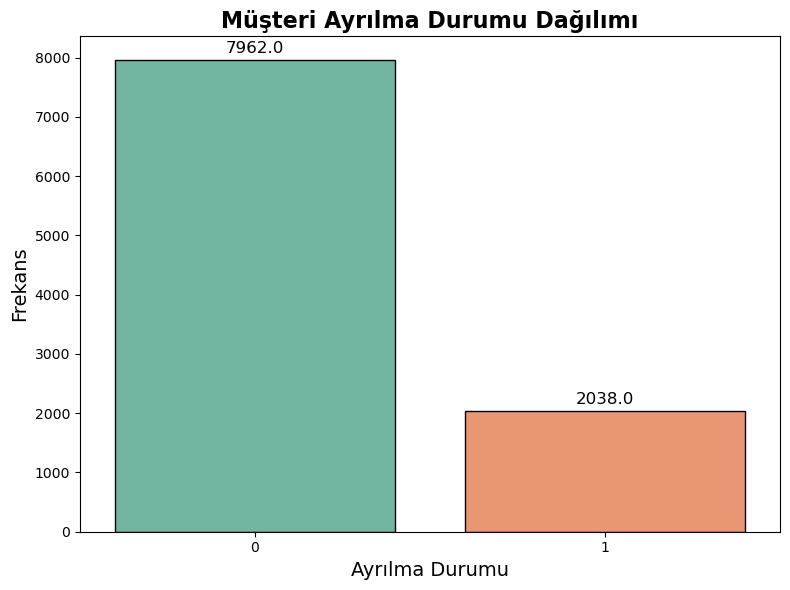

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Exited", data=df, palette="Set2", edgecolor="black")

# Her bir bar'ın içine değeri yaz
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                fontsize = 12, color = 'black', 
                xytext = (0, 8), textcoords = 'offset points')

# Başlık ve etiketleri ekle
plt.title("Müşteri Ayrılma Durumu Dağılımı", fontsize=16, weight="bold")
plt.xlabel("Ayrılma Durumu", fontsize=14)
plt.ylabel("Frekans", fontsize=14)

# Grafiği göster
plt.tight_layout()
plt.show()

### HasCrCard ve IsActiveMember pasta grafiği

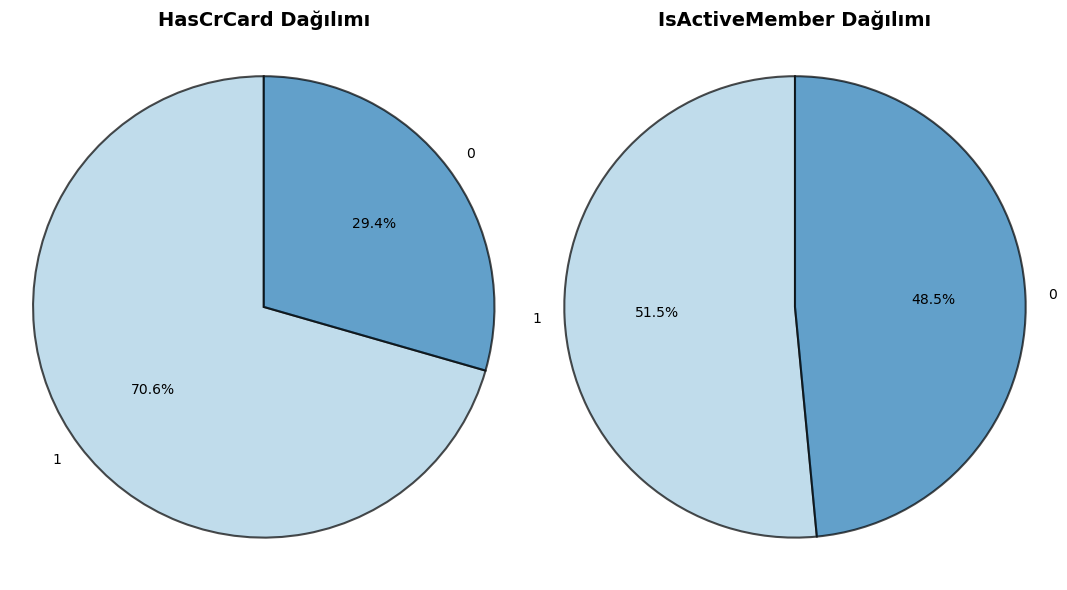

In [27]:
categorical_columns = ["HasCrCard", "IsActiveMember"]

# Görselin boyutunu ayarla
plt.figure(figsize=(16, 6))

# Pasta grafiği çizmek için her kategorik değişkeni döngüyle işlem
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)  # 1 satır ve 3 sütundan oluşan bir grid oluştur
    counts = df[col].value_counts()  # Her kategorik değişkenin frekansını al
    plt.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors, startangle=90, 
            wedgeprops={"edgecolor": "black", "linewidth": 1.5, "linestyle": "solid", "alpha": 0.7})
    plt.title(f"{col} Dağılımı", fontsize=14, weight="bold")
    plt.axis("equal")  # Daireyi yuvarlak yapmak için

# Görseli göster
plt.tight_layout()
plt.show()

## Etkilişimli grafikler

#### Bankadan Ayrılma Durumuna Göre Kredi Skoru Dağılımı

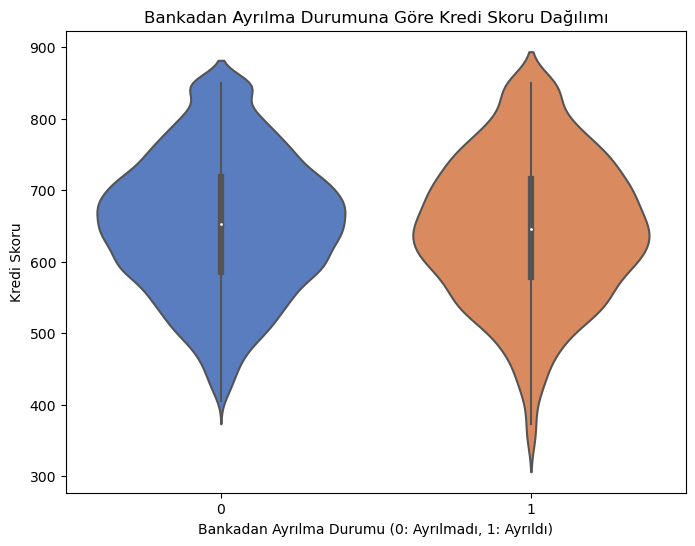

In [28]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="Exited", y="CreditScore", data=df, palette="muted")
plt.title("Bankadan Ayrılma Durumuna Göre Kredi Skoru Dağılımı")
plt.xlabel("Bankadan Ayrılma Durumu (0: Ayrılmadı, 1: Ayrıldı)")
plt.ylabel("Kredi Skoru")
plt.show()

#### Coğrafyaya Göre Kredi Skoru Dağılımı

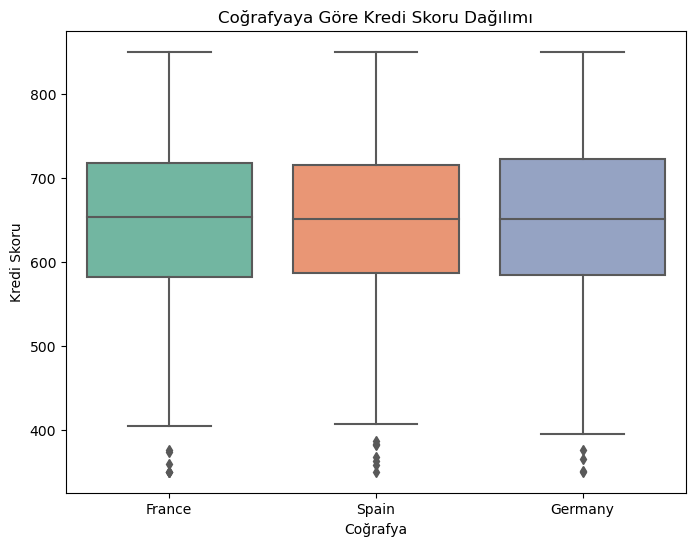

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Geography", y="CreditScore", data=df, palette="Set2")
plt.title("Coğrafyaya Göre Kredi Skoru Dağılımı")
plt.xlabel("Coğrafya")
plt.ylabel("Kredi Skoru")
plt.show()


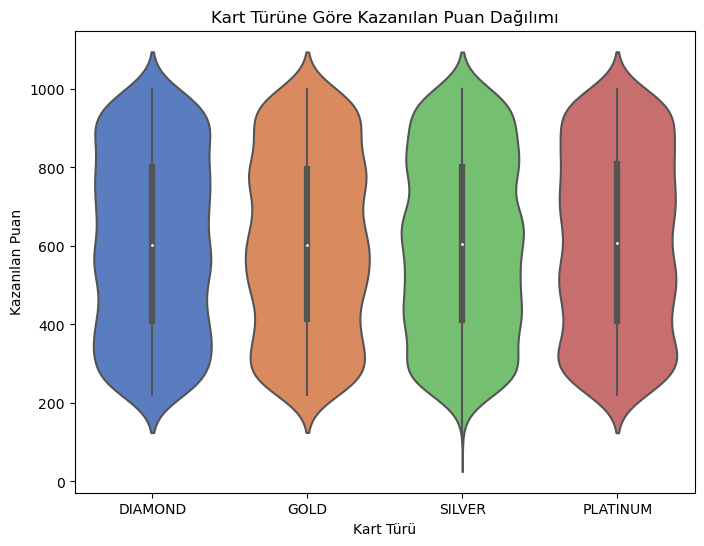

In [30]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="Card_Type", y="Point_Earned", data=df, palette="muted")
plt.title("Kart Türüne Göre Kazanılan Puan Dağılımı")
plt.xlabel("Kart Türü")
plt.ylabel("Kazanılan Puan")
plt.show()


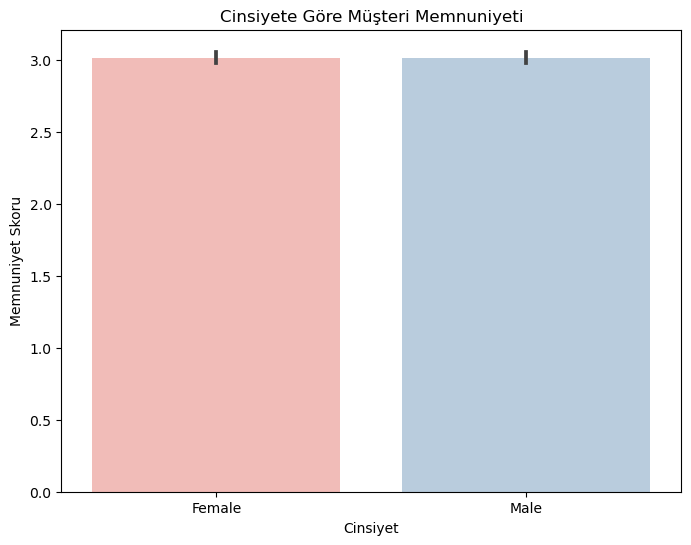

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Gender", y="Satisfaction_Score", data=df, palette="Pastel1")
plt.title("Cinsiyete Göre Müşteri Memnuniyeti")
plt.xlabel("Cinsiyet")
plt.ylabel("Memnuniyet Skoru")
plt.show()


C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


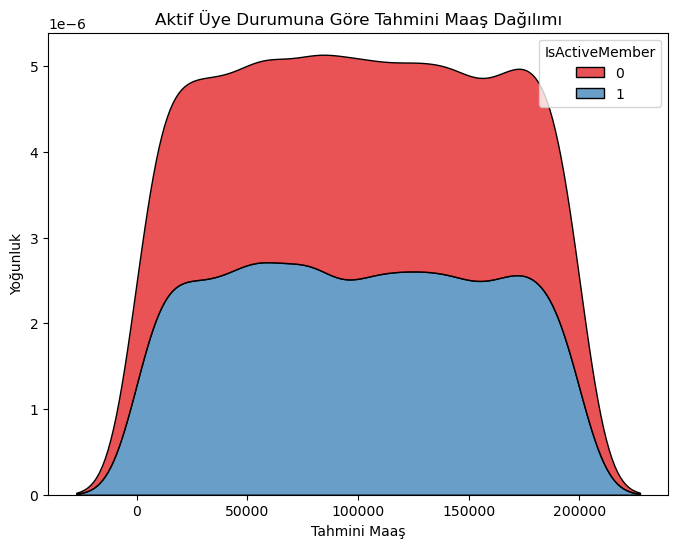

In [32]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="EstimatedSalary", hue="IsActiveMember", multiple="stack", palette="Set1")
plt.title("Aktif Üye Durumuna Göre Tahmini Maaş Dağılımı")
plt.xlabel("Tahmini Maaş")
plt.ylabel("Yoğunluk")
plt.show()


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # Yüzde formatlaması için

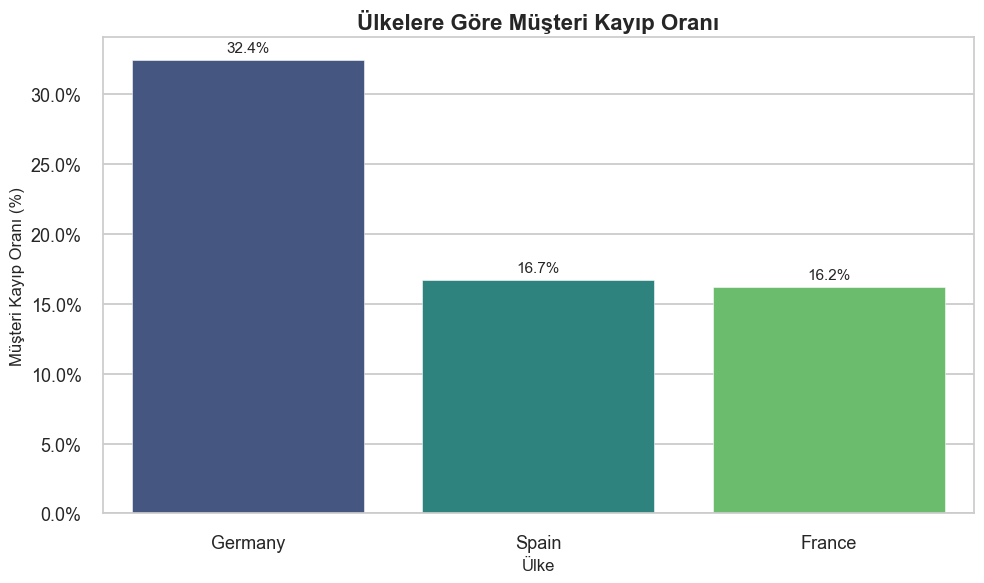


Grafik 1 Yorumu: Bu grafik, farklı ülkelerdeki müşteri kayıp oranlarını karşılaştırır. Örneğin, Almanya'daki müşterilerin ayrılma olasılığının diğer ülkelere göre daha yüksek olduğu görülebilir.
------------------------------------------------------------


In [34]:
sns.set_theme(style="whitegrid") # Daha şık bir tema
plt.style.use('seaborn-v0_8-talk') # Daha büyük ve okunaklı yazı tipleri
custom_palette = ["#6aabd4", "#d46a6a"] # Mavi (Kalan), Kırmızı (Ayrılan) tonları
churn_palette = {0: "#6aabd4", 1: "#d46a6a"} # Özel renk paleti (0: Kalan, 1: Ayrılan)

# --- Grafik 1: Ülkelere Göre Müşteri Kayıp Oranı (İkili Karşılaştırma: Geography vs Exited) ---
plt.figure(figsize=(10, 6))
# Grup bazında kayıp ortalamasını (oranını) hesapla
geo_churn = df.groupby('Geography')['Exited'].mean().reset_index().sort_values(by='Exited', ascending=False)
# Bar plot çiz
ax = sns.barplot(x='Geography', y='Exited', data=geo_churn, palette="viridis")
# Y eksenini yüzde formatına çevir
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Ülkelere Göre Müşteri Kayıp Oranı', fontsize=16, fontweight='bold')
plt.xlabel('Ülke', fontsize=12)
plt.ylabel('Müşteri Kayıp Oranı (%)', fontsize=12)
# Barların üzerine değerleri yazdır
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points', fontsize=11)
plt.tight_layout()
plt.show()
print("\nGrafik 1 Yorumu: Bu grafik, farklı ülkelerdeki müşteri kayıp oranlarını karşılaştırır. Örneğin, Almanya'daki müşterilerin ayrılma olasılığının diğer ülkelere göre daha yüksek olduğu görülebilir.\n" + "-"*60)

C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


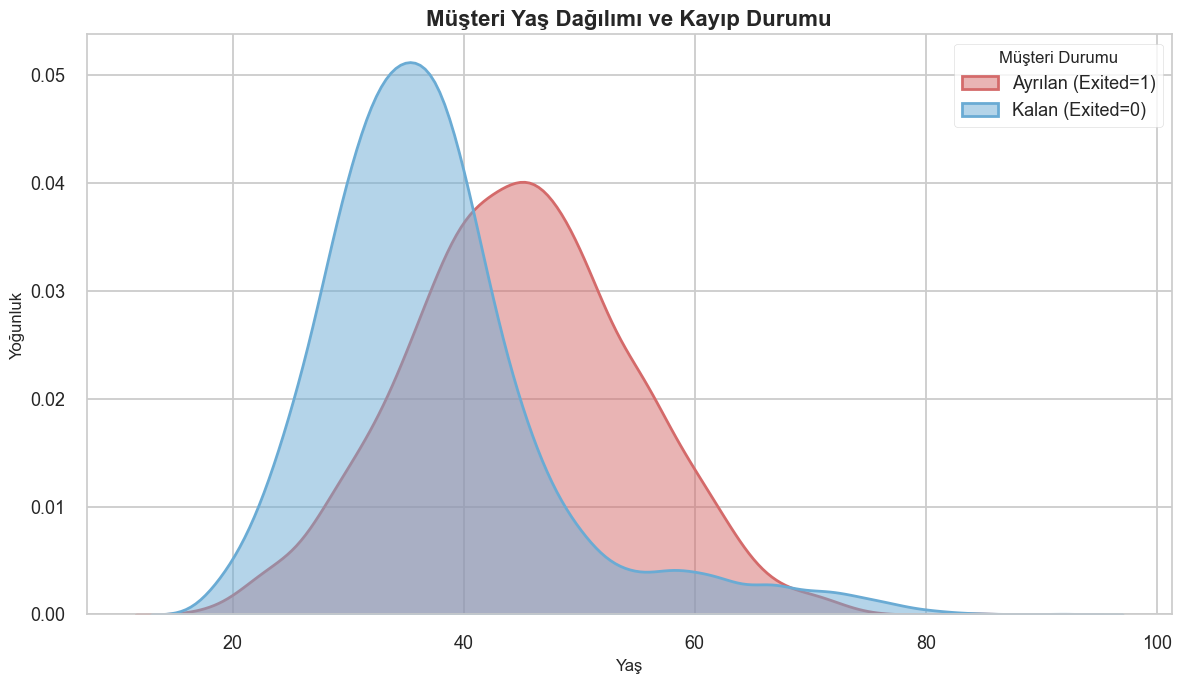


Grafik 2 Yorumu: Bu grafik, bankadan ayrılan (Exited=1) ve kalan (Exited=0) müşterilerin yaş dağılımlarını gösterir. Genellikle orta yaş ve üzeri (örn. 45-65 yaş arası) müşterilerin ayrılma eğiliminin daha yüksek olduğu gözlemlenebilirken, genç müşterilerin kalma eğilimi daha fazladır.
------------------------------------------------------------


In [35]:
# --- Grafik 2: Yaş Dağılımı ve Müşteri Kaybı (İkili Karşılaştırma: Age vs Exited) ---
plt.figure(figsize=(12, 7))
# Ayrılan ve Kalan müşteriler için yaş dağılımını göster (KDE Plot)
sns.kdeplot(data=df, x='Age', hue='Exited', fill=True, common_norm=False, palette=churn_palette, alpha=0.5, linewidth=2)
plt.title('Müşteri Yaş Dağılımı ve Kayıp Durumu', fontsize=16, fontweight='bold')
plt.xlabel('Yaş', fontsize=12)
plt.ylabel('Yoğunluk', fontsize=12)
plt.legend(title='Müşteri Durumu', labels=['Ayrılan (Exited=1)', 'Kalan (Exited=0)'])
plt.tight_layout()
plt.show()
print("\nGrafik 2 Yorumu: Bu grafik, bankadan ayrılan (Exited=1) ve kalan (Exited=0) müşterilerin yaş dağılımlarını gösterir. Genellikle orta yaş ve üzeri (örn. 45-65 yaş arası) müşterilerin ayrılma eğiliminin daha yüksek olduğu gözlemlenebilirken, genç müşterilerin kalma eğilimi daha fazladır.\n" + "-"*60)

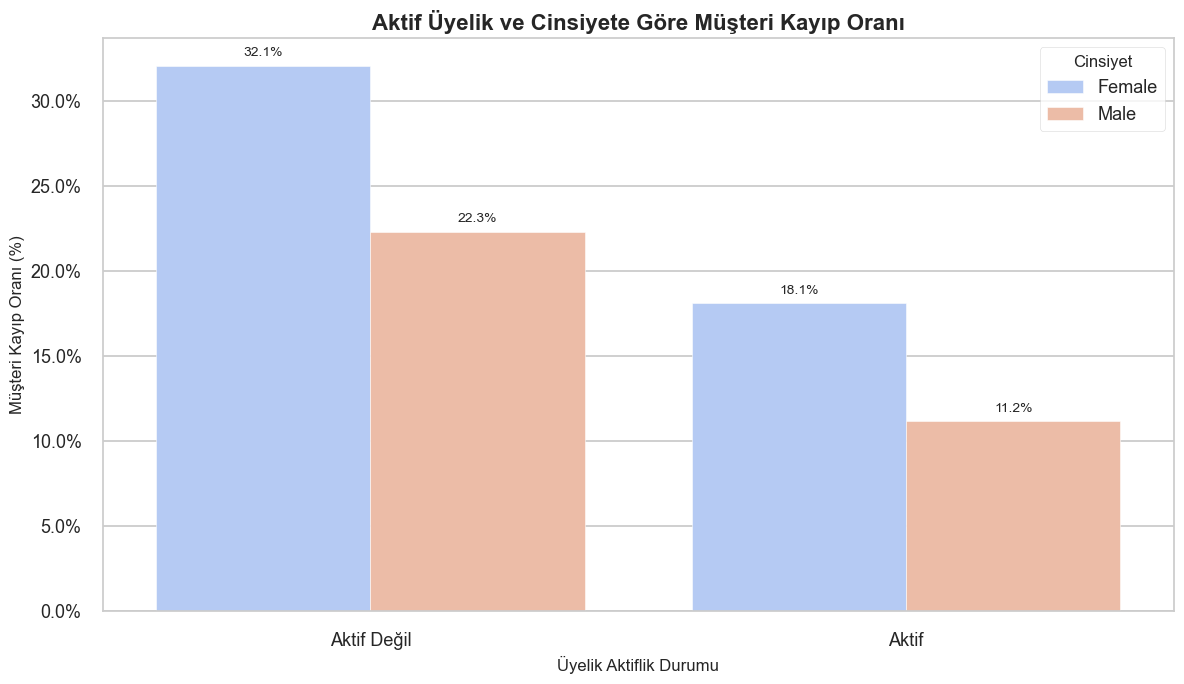


Grafik 3 Yorumu: Bu üçlü karşılaştırma, hem aktif üyelik durumunun hem de cinsiyetin müşteri kaybı üzerindeki etkisini gösterir. Genel olarak aktif olmayan üyelerin kayıp oranının daha yüksek olduğu görülür. Ayrıca, bazı durumlarda cinsiyetler arasında da (örn. aktif olmayan kadınlar vs aktif olmayan erkekler) kayıp oranlarında farklılıklar olabilir.
------------------------------------------------------------


In [36]:
# --- Grafik 3: Aktif Üyelik Durumu ve Cinsiyete Göre Kayıp Oranı (Üçlü Karşılaştırma: IsActiveMember, Gender, Exited) ---
plt.figure(figsize=(12, 7))
# Aktiflik ve Cinsiyete göre gruplayıp kayıp oranını hesapla
active_gender_churn = df.groupby(['IsActiveMember', 'Gender'])['Exited'].mean().reset_index()
active_gender_churn['IsActiveMember'] = active_gender_churn['IsActiveMember'].map({0: 'Aktif Değil', 1: 'Aktif'}) # Daha anlaşılır etiketler
# Çubuk grafik çiz
ax = sns.barplot(data=active_gender_churn, x='IsActiveMember', y='Exited', hue='Gender', palette="coolwarm")
# Y eksenini yüzde formatına çevir
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Aktif Üyelik ve Cinsiyete Göre Müşteri Kayıp Oranı', fontsize=16, fontweight='bold')
plt.xlabel('Üyelik Aktiflik Durumu', fontsize=12)
plt.ylabel('Müşteri Kayıp Oranı (%)', fontsize=12)
plt.legend(title='Cinsiyet', loc='upper right')
# Barların üzerine değerleri yazdır
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points', fontsize=10)
plt.tight_layout()
plt.show()
print("\nGrafik 3 Yorumu: Bu üçlü karşılaştırma, hem aktif üyelik durumunun hem de cinsiyetin müşteri kaybı üzerindeki etkisini gösterir. Genel olarak aktif olmayan üyelerin kayıp oranının daha yüksek olduğu görülür. Ayrıca, bazı durumlarda cinsiyetler arasında da (örn. aktif olmayan kadınlar vs aktif olmayan erkekler) kayıp oranlarında farklılıklar olabilir.\n" + "-"*60)

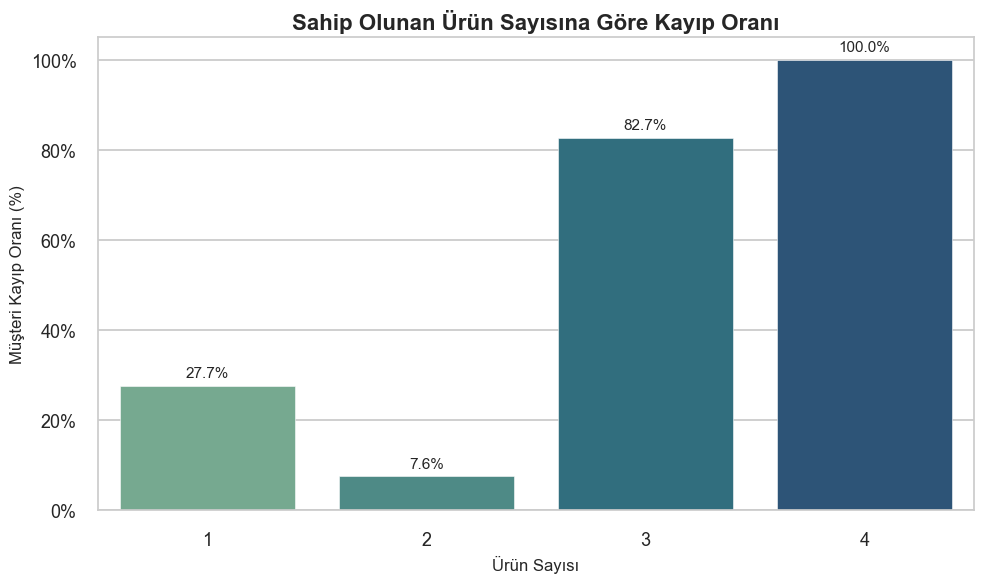


Grafik 4 Yorumu: Müşterinin sahip olduğu ürün sayısı ile ayrılma olasılığı arasındaki ilişkiyi gösterir. Genellikle 1 veya 2 ürüne sahip müşterilerin kalma olasılığı daha yüksektir. 3 veya daha fazla ürüne sahip müşterilerde ise (belki de karmaşıklık veya ihtiyaçların karşılanamaması nedeniyle) ayrılma oranının arttığı görülebilir.
------------------------------------------------------------


In [37]:
# --- Grafik 4: Sahip Olunan Ürün Sayısı ve Müşteri Kaybı (İkili Karşılaştırma: NumOfProducts vs Exited) ---
plt.figure(figsize=(10, 6))
# Ürün sayısına göre kayıp oranını hesapla
prod_churn = df.groupby('NumOfProducts')['Exited'].mean().reset_index()
# Çubuk grafik çiz
ax = sns.barplot(data=prod_churn, x='NumOfProducts', y='Exited', palette="crest")
# Y eksenini yüzde formatına çevir
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Sahip Olunan Ürün Sayısına Göre Kayıp Oranı', fontsize=16, fontweight='bold')
plt.xlabel('Ürün Sayısı', fontsize=12)
plt.ylabel('Müşteri Kayıp Oranı (%)', fontsize=12)
# Barların üzerine değerleri yazdır
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points', fontsize=11)
plt.tight_layout()
plt.show()
print("\nGrafik 4 Yorumu: Müşterinin sahip olduğu ürün sayısı ile ayrılma olasılığı arasındaki ilişkiyi gösterir. Genellikle 1 veya 2 ürüne sahip müşterilerin kalma olasılığı daha yüksektir. 3 veya daha fazla ürüne sahip müşterilerde ise (belki de karmaşıklık veya ihtiyaçların karşılanamaması nedeniyle) ayrılma oranının arttığı görülebilir.\n" + "-"*60)


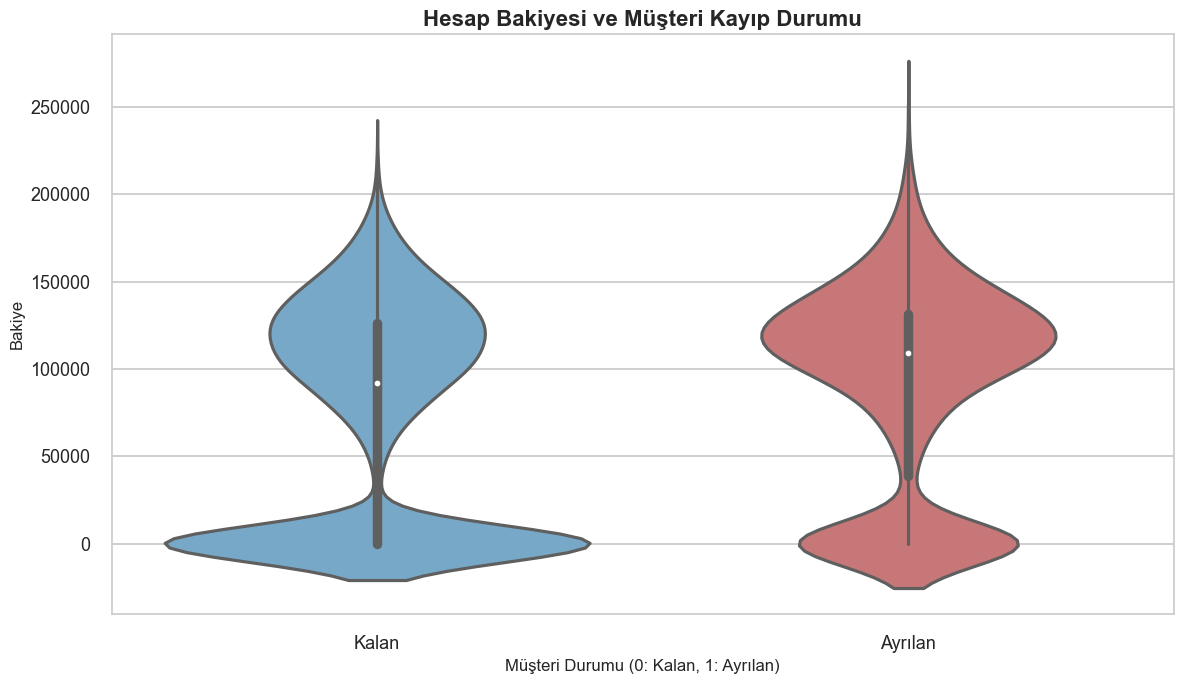


Grafik 5 Yorumu: Bu keman grafiği, ayrılan ve kalan müşterilerin hesap bakiyesi dağılımlarını karşılaştırır. Genellikle bakiyesi sıfır olmayan (yani hesabında para bulunan) müşteriler arasında ayrılma oranının daha yüksek olabileceği gözlemlenir. Bakiyesi sıfır olan müşterilerin ise genellikle kalma eğiliminde olduğu görülür. Ayrılan müşterilerin bakiye dağılımı daha merkezde toplanmış olabilir.
------------------------------------------------------------


In [38]:
# --- Grafik 5: Bakiye ve Müşteri Kaybı (İkili Karşılaştırma: Balance vs Exited) ---
plt.figure(figsize=(12, 7))
# Keman grafiği (Box + KDE) ile bakiye dağılımını kayıp durumuna göre göster
sns.violinplot(data=df, x='Exited', y='Balance', palette=churn_palette)
plt.title('Hesap Bakiyesi ve Müşteri Kayıp Durumu', fontsize=16, fontweight='bold')
plt.xlabel('Müşteri Durumu (0: Kalan, 1: Ayrılan)', fontsize=12)
plt.ylabel('Bakiye', fontsize=12)
plt.xticks([0, 1], ['Kalan', 'Ayrılan']) # X ekseni etiketlerini düzelt
plt.tight_layout()
plt.show()
print("\nGrafik 5 Yorumu: Bu keman grafiği, ayrılan ve kalan müşterilerin hesap bakiyesi dağılımlarını karşılaştırır. Genellikle bakiyesi sıfır olmayan (yani hesabında para bulunan) müşteriler arasında ayrılma oranının daha yüksek olabileceği gözlemlenir. Bakiyesi sıfır olan müşterilerin ise genellikle kalma eğiliminde olduğu görülür. Ayrılan müşterilerin bakiye dağılımı daha merkezde toplanmış olabilir.\n" + "-"*60)

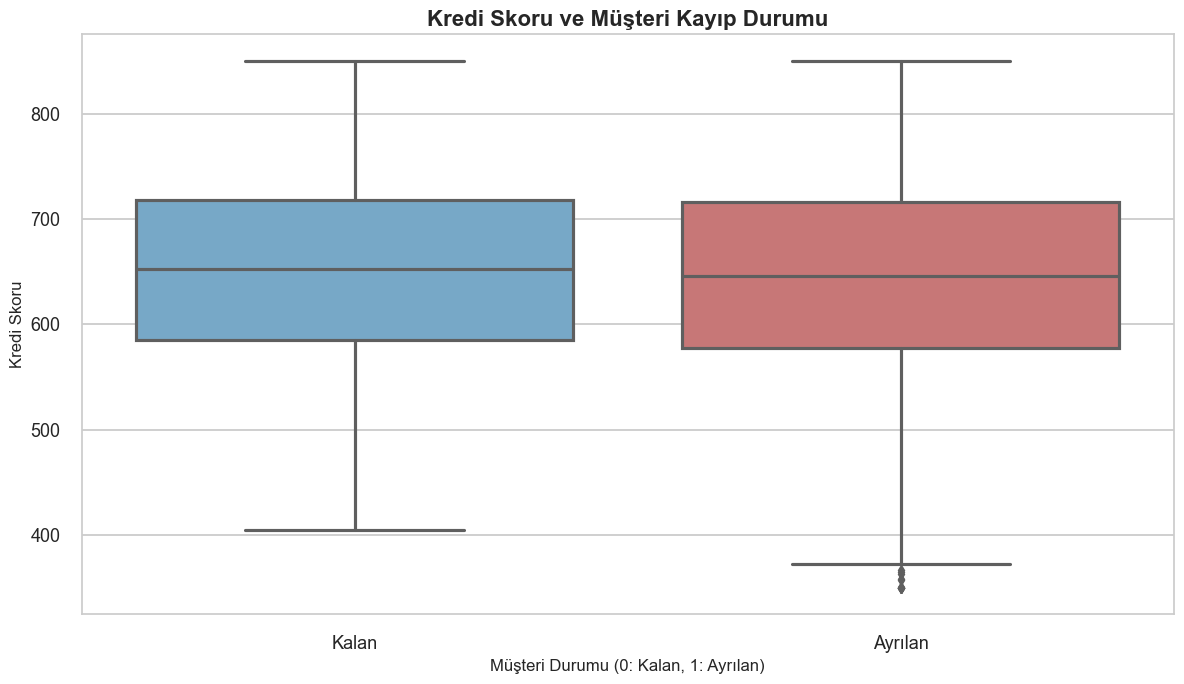


Grafik 6 Yorumu: Kredi skorunun müşteri kaybı ile ilişkisini gösterir. Genellikle çok düşük kredi skoruna sahip müşterilerde hafif bir ayrılma eğilimi artışı görülebilir, ancak genel olarak kredi skorunun tek başına çok güçlü bir ayrım yapmadığı durumlar da olabilir. Ayrılan ve kalan müşterilerin medyan kredi skorları birbirine yakın olabilir.
------------------------------------------------------------


In [39]:
# --- Grafik 6: Kredi Skoru ve Müşteri Kaybı (İkili Karşılaştırma: CreditScore vs Exited) ---
plt.figure(figsize=(12, 7))
# Box plot ile kredi skoru dağılımını kayıp durumuna göre göster
sns.boxplot(data=df, x='Exited', y='CreditScore', palette=churn_palette)
plt.title('Kredi Skoru ve Müşteri Kayıp Durumu', fontsize=16, fontweight='bold')
plt.xlabel('Müşteri Durumu (0: Kalan, 1: Ayrılan)', fontsize=12)
plt.ylabel('Kredi Skoru', fontsize=12)
plt.xticks([0, 1], ['Kalan', 'Ayrılan']) # X ekseni etiketlerini düzelt
plt.tight_layout()
plt.show()
print("\nGrafik 6 Yorumu: Kredi skorunun müşteri kaybı ile ilişkisini gösterir. Genellikle çok düşük kredi skoruna sahip müşterilerde hafif bir ayrılma eğilimi artışı görülebilir, ancak genel olarak kredi skorunun tek başına çok güçlü bir ayrım yapmadığı durumlar da olabilir. Ayrılan ve kalan müşterilerin medyan kredi skorları birbirine yakın olabilir.\n" + "-"*60)

## Korelasyon Analizi

In [40]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_categorical_columns(df):
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns  # Sayısal olmayan sütunları seç
    
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])  # Label encoding işlemi
    
    return df

In [41]:
df_1 = df.copy()

In [42]:
encode_categorical_columns(df_1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,300
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,564
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339


In [43]:
# Korelasyon matrisini hesapla
corr_matrix = df_1.corr()

In [44]:
corr_matrix

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,-0.006936,0.000077
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035712,0.035830,-0.001718,-0.013462,-0.008479
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106267,-0.106287,0.000242,-0.008726,-0.013225
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,-0.006997,0.002222
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.001414,-0.010196
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,-0.027059,0.014608
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,0.020387,-0.015330
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,0.005809,-0.011041
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,0.016247,-0.004983
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,0.014295,-0.001515


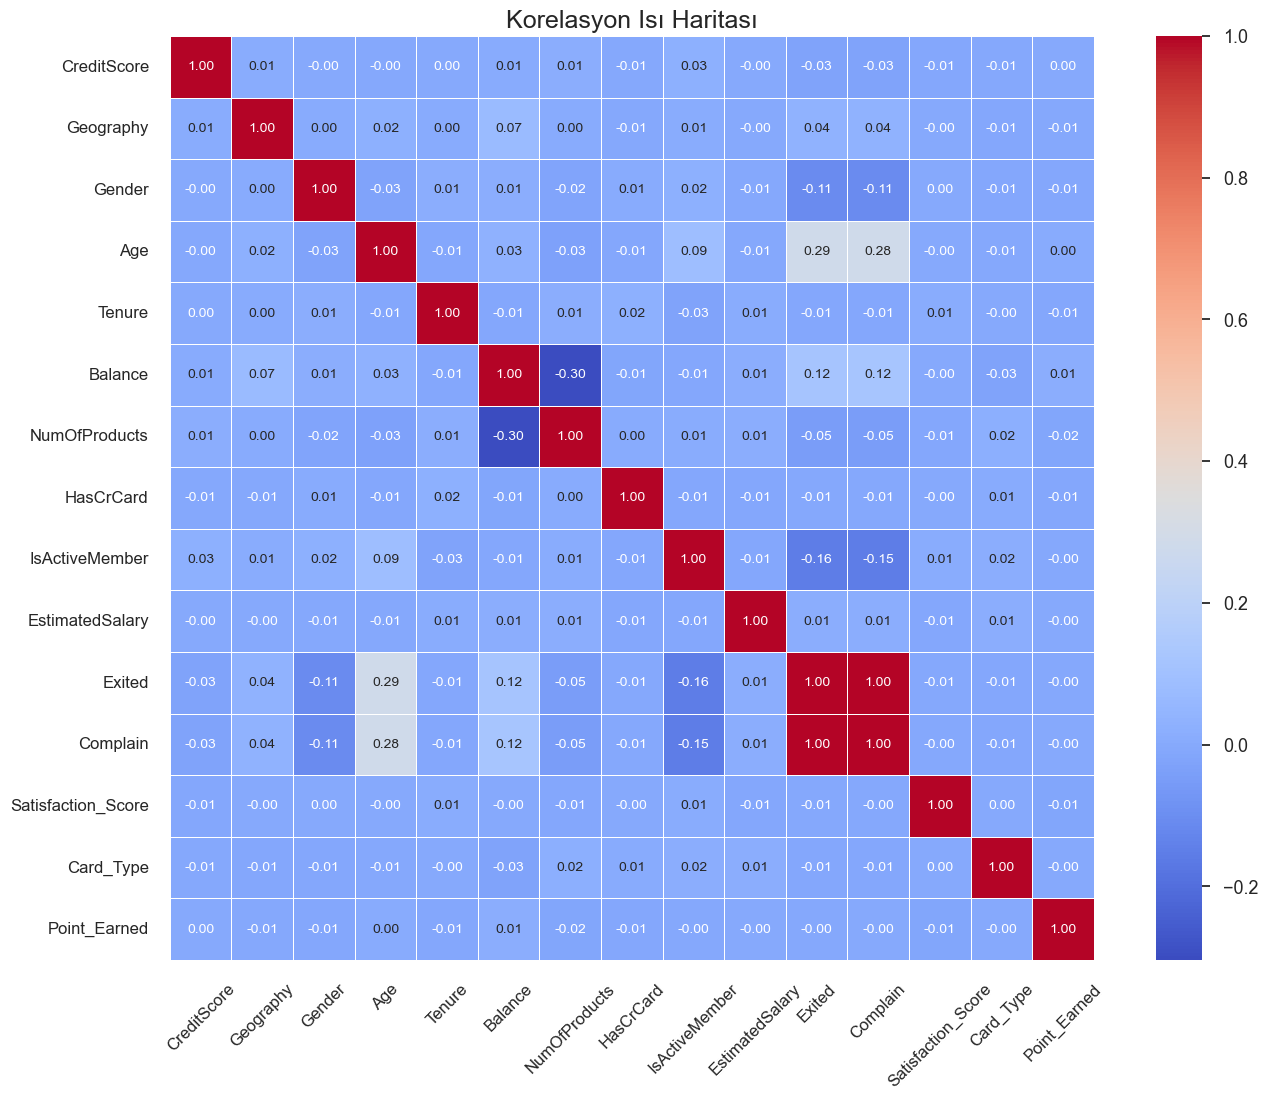

In [45]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, annot_kws={"size": 10})
plt.title('Korelasyon Isı Haritası', fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.show()

In [46]:
def optimize_correlation(df, target_col, initial_corr_threshold=1.0, step=0.05, min_corr_threshold=0.3):
    results = []
    
    # Hedef değişkeni ve bağımsız değişkenleri ayırma
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Başlangıç modeli
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    base_accuracy = accuracy_score(y_test, y_pred)
    results.append((initial_corr_threshold, "No Removal", base_accuracy))
    
    # Korelasyon matrisini hesaplama
    corr_matrix = df.corr().abs()
    np.fill_diagonal(corr_matrix.values, 0)
    
    current_threshold = initial_corr_threshold
    while current_threshold > min_corr_threshold:
        # Mevcut eşiğe göre yüksek korelasyona sahip değişken çiftlerini bul
        correlated_pairs = [(a, b) for a, b in zip(*np.where(corr_matrix >= current_threshold)) if a < b]
        
        if not correlated_pairs:
            current_threshold -= step
            continue
        
        for A, B in correlated_pairs:
            col_A, col_B = df.columns[A], df.columns[B]
            
            # Farklı senaryoları test et
            for remove_vars in [[col_A], [col_B], [col_A, col_B]]:
                X_reduced = X.drop(columns=remove_vars, errors='ignore')
                X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                results.append((current_threshold, f"Removed {remove_vars}", accuracy))
        
        # Eşiği azalt
        current_threshold -= step
        corr_matrix = df.corr().abs()
        np.fill_diagonal(corr_matrix.values, 0)
    
    # Sonuçları analiz etme
    best_result = max(results, key=lambda x: x[2])
    print("En yüksek doğruluk:", best_result[2])
    print("Korelasyon eşiği:", best_result[0])
    print("Silinen değişkenler:", best_result[1])
    
    return results


In [47]:
df_1 = df_1.drop(columns=['Complain'])

In [48]:
optimize_correlation(df_1,'Exited', initial_corr_threshold=0.40, step=0.01, min_corr_threshold=0.01)

En yüksek doğruluk: 0.863
Korelasyon eşiği: 0.019999999999999803
Silinen değişkenler: Removed ['Tenure', 'HasCrCard']


[(0.4, 'No Removal', 0.853),
 (0.29999999999999993, "Removed ['Balance']", 0.8505),
 (0.29999999999999993, "Removed ['NumOfProducts']", 0.83),
 (0.29999999999999993, "Removed ['Balance', 'NumOfProducts']", 0.8255),
 (0.2899999999999999, "Removed ['Balance']", 0.8505),
 (0.2899999999999999, "Removed ['NumOfProducts']", 0.83),
 (0.2899999999999999, "Removed ['Balance', 'NumOfProducts']", 0.8255),
 (0.2799999999999999, "Removed ['Age']", 0.819),
 (0.2799999999999999, "Removed ['Exited']", 0.853),
 (0.2799999999999999, "Removed ['Age', 'Exited']", 0.819),
 (0.2799999999999999, "Removed ['Balance']", 0.8505),
 (0.2799999999999999, "Removed ['NumOfProducts']", 0.83),
 (0.2799999999999999, "Removed ['Balance', 'NumOfProducts']", 0.8255),
 (0.2699999999999999, "Removed ['Age']", 0.819),
 (0.2699999999999999, "Removed ['Exited']", 0.853),
 (0.2699999999999999, "Removed ['Age', 'Exited']", 0.819),
 (0.2699999999999999, "Removed ['Balance']", 0.8505),
 (0.2699999999999999, "Removed ['NumOfProduct

## aykırı değer analizi

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction_Score  10000 non-null  int64  
 13  Card_Type           10000 non-null  object 
 14  Point_Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [50]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [51]:
df_2 = df.copy()

In [52]:
df_2 = df_2.drop(columns=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Complain','Satisfaction_Score',
                          'Card_Type','Exited'])

### IQR analizi

In [53]:
import scipy.stats as stats

In [54]:
def aykiri_deger_degiskenleri_bul(df, iqr_multiplier=1.5):
    """
    Veri çerçevesindeki hangi sayısal sütunların aykırı değer içerdiğini bulur.

    Args:
        df (pd.DataFrame): Analiz edilecek veri çerçevesi.
        iqr_multiplier (float): IQR çarpanı. Varsayılan değer 1.5'tir.

    Returns:
        list: Aykırı değer içeren sütunların adlarını içeren bir liste.
             DataFrame'de hiç sayısal sütun yoksa boş bir liste döndürür.

    """
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    if not numeric_cols:
        return [] # Hiç sayısal sütun yoksa boş liste döndür
        
    outlier_columns = []

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # Sütunda IQR yöntemine göre aykırı değer varsa, sütun adını listeye ekle
        if any((df[col] < lower_bound) | (df[col] > upper_bound)):
            outlier_columns.append(col)

    return outlier_columns

In [55]:
aykiri_deger_degiskenleri_bul(df_2)

['CreditScore', 'Age']

In [56]:
# 2️⃣ Aykırı Değer Analizi için Değişken Seçimi
numeric_columns = df_2.select_dtypes(include=[np.number]).columns.tolist()

# IQR Yöntemi ile Aykırı Değer Analizi
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outlier_counts_iqr = {}
for col in numeric_columns:
    outliers = detect_outliers_iqr(df_2, col)  # data yerine df kullanıldı
    outlier_counts_iqr[col] = len(outliers)

# Aykırı değer sayısını yazdırma
print(outlier_counts_iqr)

{'CreditScore': 15, 'Age': 359, 'Tenure': 0, 'Balance': 0, 'EstimatedSalary': 0, 'Point_Earned': 0}


### z-score

In [57]:
def aykiri_deger_degiskenleri_bul_zscore(df, z_threshold=3):
    """
    Veri çerçevesindeki hangi sayısal sütunların Z-skoruna göre aykırı değer içerdiğini bulur.

    Args:
        df (pd.DataFrame): Analiz edilecek veri çerçevesi.
        z_threshold (float): Z-skoru eşiği. Varsayılan değer 3'tür.

    Returns:
        list: Aykırı değer içeren sütunların adlarını içeren bir liste.
             DataFrame'de hiç sayısal sütun yoksa boş bir liste döndürür.
    """

    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

    if not numeric_cols:
        return []  # Hiç sayısal sütun yoksa boş liste döndür

    outlier_columns = []

    for col in numeric_cols:
        z = np.abs(stats.zscore(df[col]))

        # Sütunda Z-skoru eşik değerini aşan bir değer varsa, sütun adını listeye ekle
        if any(z > z_threshold):
            outlier_columns.append(col)

    return outlier_columns

In [58]:
aykiri_deger_degiskenleri_bul_zscore(df_2)

['CreditScore', 'Age']

### IQR ve Z-Score Yöntemlerinin Aykırı Değer Tespitindeki Karşılaştırması

In [59]:
# Aykırı değer içeren değişkenleri bulan iki farklı yöntem
aykiri_iqr = set(aykiri_deger_degiskenleri_bul(df_2))
aykiri_zscore = set(aykiri_deger_degiskenleri_bul_zscore(df_2))

# Ortak değişkenler
ortak_degiskenler = aykiri_iqr & aykiri_zscore

# Ortak olmayan değişkenler
sadece_iqr = aykiri_iqr - aykiri_zscore
sadece_zscore = aykiri_zscore - aykiri_iqr

# Sonuçları yazdırma
print(f"✅ Ortak Aykırı Değer İçeren Değişkenler: {list(ortak_degiskenler)}")
print(f"📌 Sadece IQR Yöntemi ile Aykırı Olarak Belirlenenler: {list(sadece_iqr)}")
print(f"📌 Sadece Z-Score Yöntemi ile Aykırı Olarak Belirlenenler: {list(sadece_zscore)}")


✅ Ortak Aykırı Değer İçeren Değişkenler: ['CreditScore', 'Age']
📌 Sadece IQR Yöntemi ile Aykırı Olarak Belirlenenler: []
📌 Sadece Z-Score Yöntemi ile Aykırı Olarak Belirlenenler: []


### Aykırı değer görselleştirme

C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


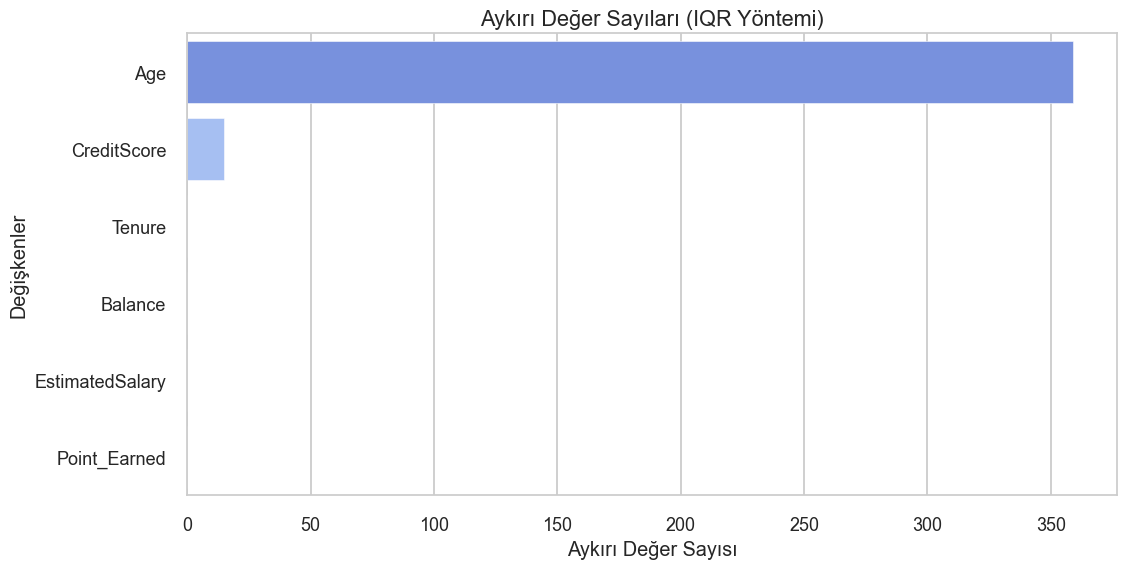

In [60]:
# Aykırı Değer Sayıları
outlier_counts = {}
for col in df_2.select_dtypes(include=[np.number]).columns:
    Q1 = df_2[col].quantile(0.25)
    Q3 = df_2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_counts[col] = ((df[col] < lower_bound) | (df_2[col] > upper_bound)).sum()

outlier_counts = dict(sorted(outlier_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(outlier_counts.values()), y=list(outlier_counts.keys()), palette="coolwarm")
plt.title("Aykırı Değer Sayıları (IQR Yöntemi)")
plt.xlabel("Aykırı Değer Sayısı")
plt.ylabel("Değişkenler")
plt.show()

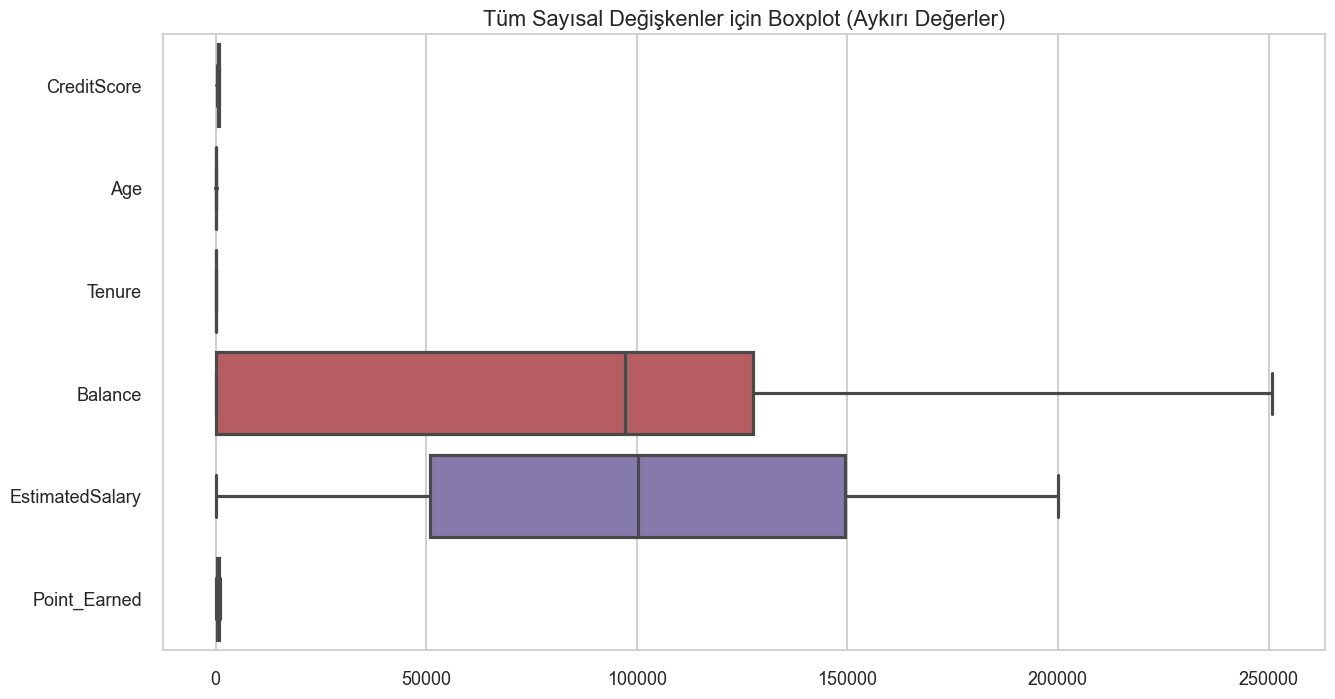

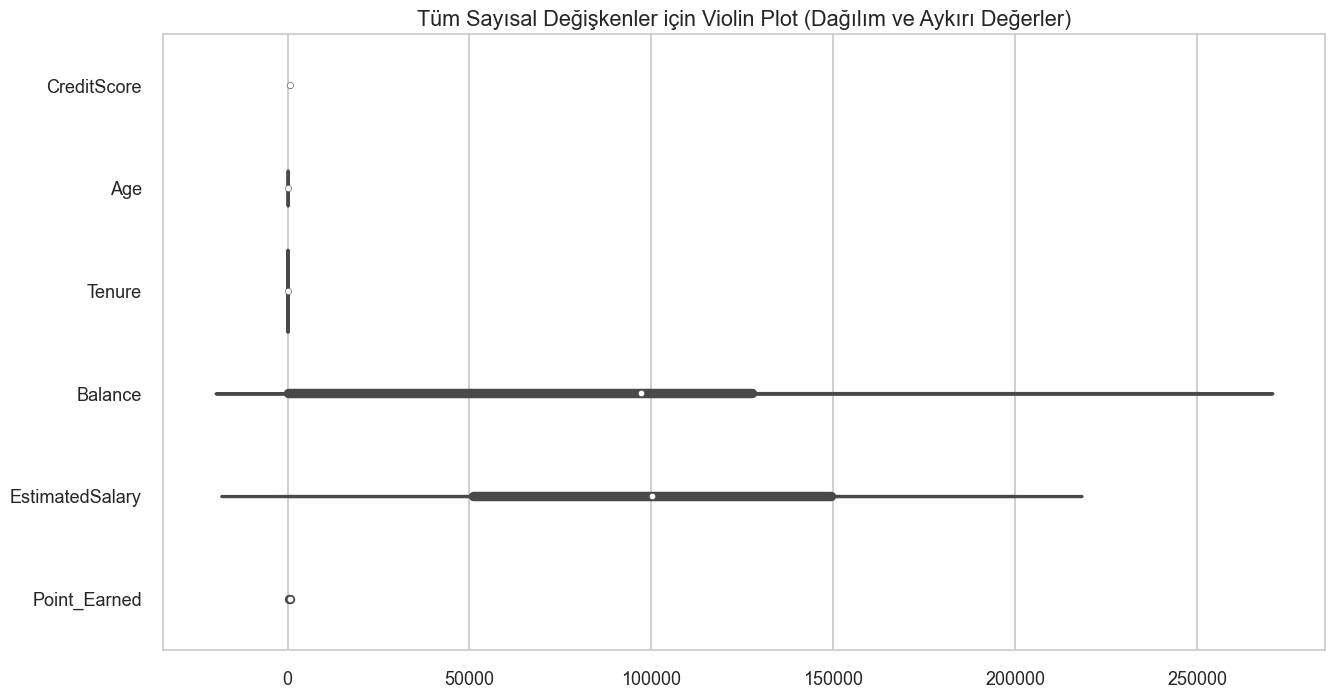

In [61]:
# Aykırı Değer Analizi (Toplu Görselleştirme)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_2.select_dtypes(include=[np.number]), orient="h", fliersize=2) 
plt.title("Tüm Sayısal Değişkenler için Boxplot (Aykırı Değerler)")
plt.show()

plt.figure(figsize=(15, 8))
sns.violinplot(data=df_2.select_dtypes(include=[np.number]), orient="h") 
plt.title("Tüm Sayısal Değişkenler için Violin Plot (Dağılım ve Aykırı Değerler)")
plt.show()

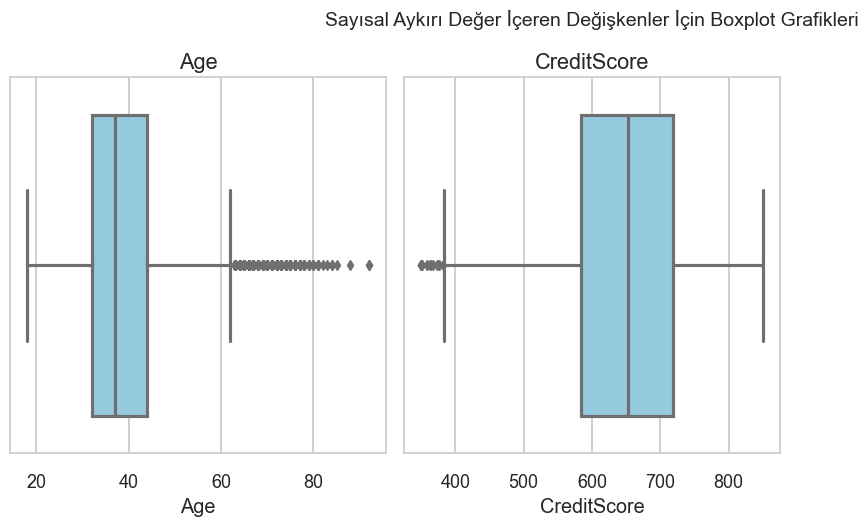

In [62]:
# Sadece sayısal değişkenleri seçme
sayisal_degiskenler = ['Age', 'CreditScore']

# Grafik boyutlarını ayarlama
plt.figure(figsize=(12, 5))

# Her değişken için ayrı boxplot çizme
for i, degisken in enumerate(sayisal_degiskenler, 1):
    plt.subplot(1, 3, i)  # 1 satır, 3 sütun düzeni
    sns.boxplot(x=df_2[degisken], color='skyblue')
    plt.title(degisken)

# Grafik düzenini sıkılaştırma
plt.tight_layout()
plt.suptitle("Sayısal Aykırı Değer İçeren Değişkenler İçin Boxplot Grafikleri", fontsize=14, y=1.05)
plt.show()

C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


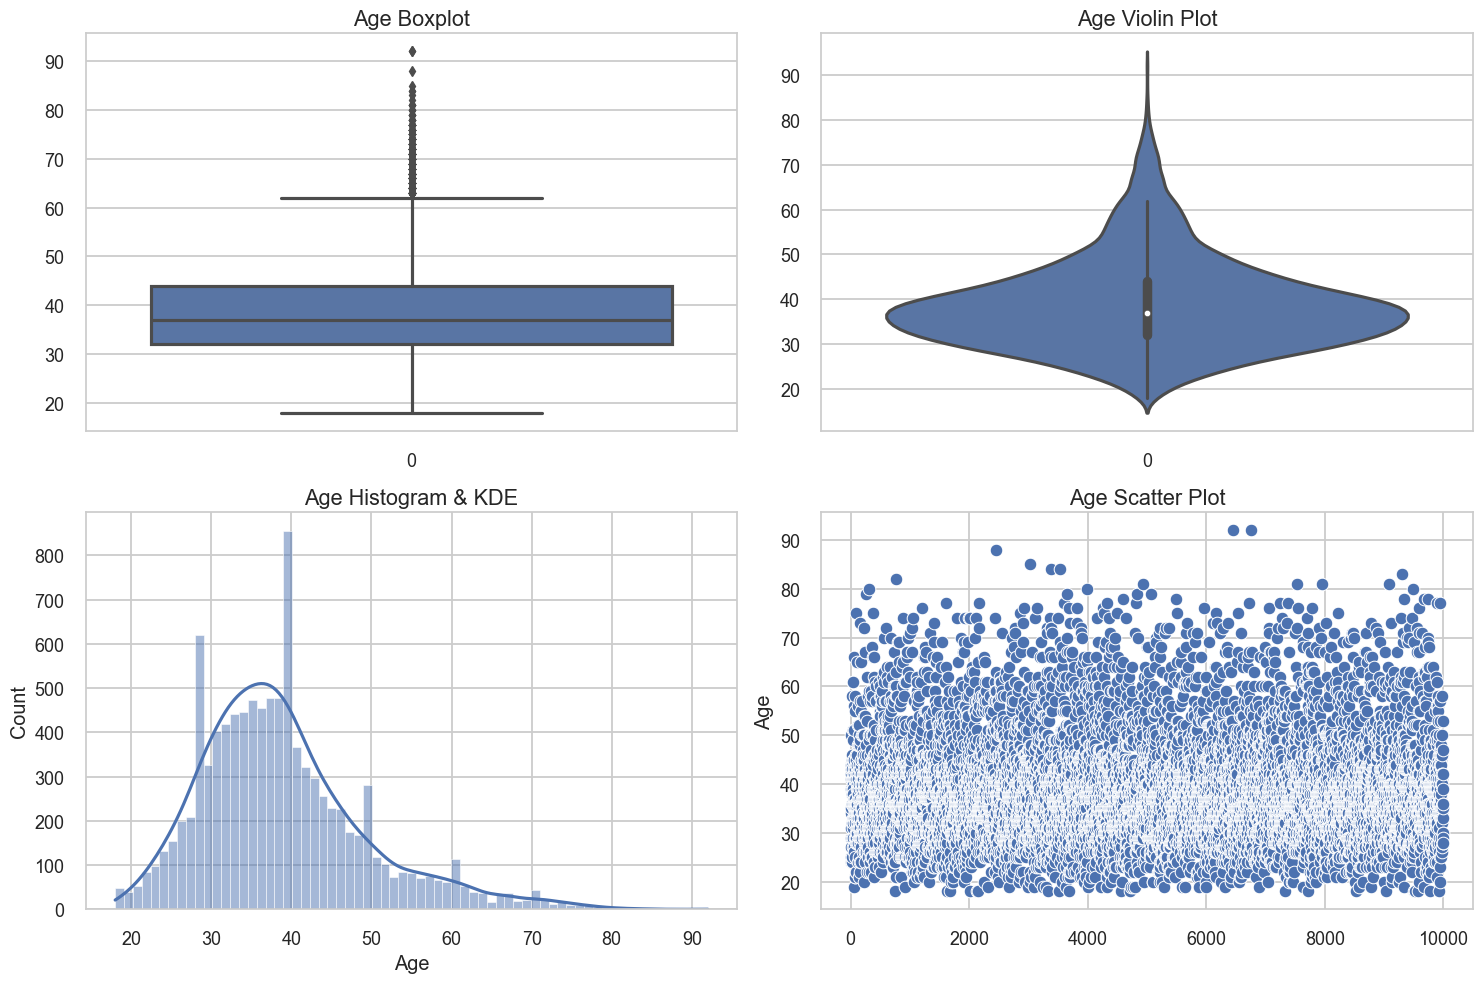

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(df_2['Age'], ax=axes[0, 0])
axes[0, 0].set_title("Age Boxplot")
sns.violinplot(df_2['Age'], ax=axes[0, 1])
axes[0, 1].set_title("Age Violin Plot")
sns.histplot(df_2['Age'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Age Histogram & KDE")
sns.scatterplot(x=df_2.index, y=df_2['Age'], ax=axes[1, 1])
axes[1, 1].set_title("Age Scatter Plot")
plt.tight_layout()
plt.show()

C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


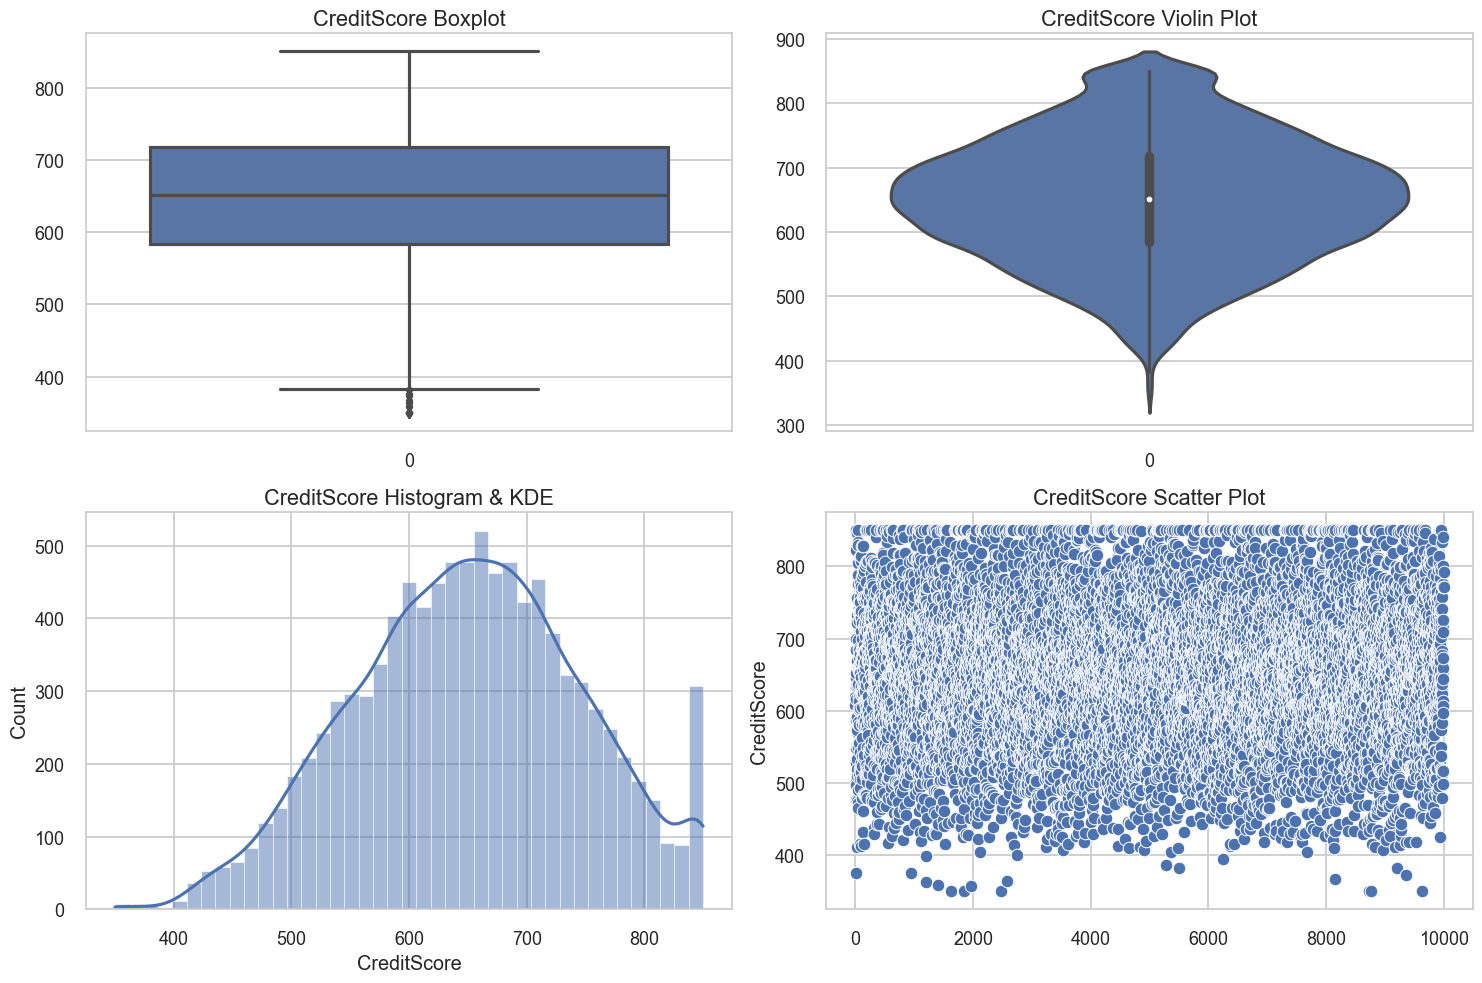

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(df_2['CreditScore'], ax=axes[0, 0])
axes[0, 0].set_title("CreditScore Boxplot")
sns.violinplot(df_2['CreditScore'], ax=axes[0, 1])
axes[0, 1].set_title("CreditScore Violin Plot")
sns.histplot(df_2['CreditScore'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("CreditScore Histogram & KDE")
sns.scatterplot(x=df_2.index, y=df_2['CreditScore'], ax=axes[1, 1])
axes[1, 1].set_title("CreditScore Scatter Plot")
plt.tight_layout()
plt.show()

#### Age ve CreditScore Değişkenlerinin Model Üzerindeki Etkisinin Karşılaştırılması

In [65]:
df_22 = df.copy() 

In [66]:
df_22 = df_22.drop(columns=['Tenure','HasCrCard','Complain'])

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

def evaluate_feature_removal(df, target_col, features_to_remove):
    """
    Belirtilen değişkenleri sırasıyla veri setinden çıkararak modeli eğiten ve doğruluk oranlarını karşılaştıran fonksiyon.
    
    Parametreler:
    df: Veri çerçevesi (DataFrame)
    target_col: Hedef değişkenin ismi (str)
    features_to_remove: Test edilecek değişkenlerin listesi (list)
    
    Dönüş:
    En iyi doğruluk ve değişken kombinasyonu
    """
    
    # Kategorik değişkenleri sayısal verilere dönüştür
    df_encoded = pd.get_dummies(df, drop_first=True)  # One-Hot Encoding uygula
    
    X = df_encoded.drop(columns=[target_col])
    y = df_encoded[target_col]
    
    results = []
    
    def train_and_evaluate(X, y, removed_features):
        """Belirtilen değişkenleri çıkararak modeli eğitir ve doğruluğu döndürür."""
        X_reduced = X.drop(columns=removed_features, errors='ignore')
        X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
        model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    # Tüm değişkenlerle doğruluk
    accuracy_base = train_and_evaluate(X, y, [])
    results.append(("Tüm değişkenler", accuracy_base))

    # Hiçbir değişken çıkarılmadığı durumda doğruluk
    accuracy_no_removal = train_and_evaluate(X, y, [])
    results.append(("Hiçbir değişken çıkarılmadı", accuracy_no_removal))

    # Tek tek değişkenleri çıkararak doğruluğu hesapla
    for feature in features_to_remove:
        accuracy = train_and_evaluate(X, y, [feature])
        results.append((f"Sadece '{feature}' çıkarıldı", accuracy))

    # Tüm değişkenleri aynı anda çıkararak doğruluğu hesapla
    accuracy_both = train_and_evaluate(X, y, features_to_remove)
    results.append((f"{features_to_remove} çıkarıldı", accuracy_both))

    # En yüksek doğruluğu belirle
    best_case = max(results, key=lambda x: x[1])

    print("\nSonuçlar:")
    for scenario, acc in results:
        print(f"{scenario}: {acc:.4f}")
    
    print("\nEn yüksek doğruluk oranı:", best_case[1])
    print("En iyi değişken kombinasyonu:", best_case[0])

    return results


In [68]:
evaluate_feature_removal(df_22,target_col="Exited", features_to_remove=["Age", "CreditScore"])


Sonuçlar:
Tüm değişkenler: 0.8650
Hiçbir değişken çıkarılmadı: 0.8650
Sadece 'Age' çıkarıldı: 0.8245
Sadece 'CreditScore' çıkarıldı: 0.8530
['Age', 'CreditScore'] çıkarıldı: 0.8160

En yüksek doğruluk oranı: 0.865
En iyi değişken kombinasyonu: Tüm değişkenler


[('Tüm değişkenler', 0.865),
 ('Hiçbir değişken çıkarılmadı', 0.865),
 ("Sadece 'Age' çıkarıldı", 0.8245),
 ("Sadece 'CreditScore' çıkarıldı", 0.853),
 ("['Age', 'CreditScore'] çıkarıldı", 0.816)]

#### age ve creditScore değişkenlerine dönüşüm

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import xgboost as xgb

def evaluate_transformation(df, target_col, feature_col):
    # Modeli eğitmek ve doğruluğu hesaplamak için yardımcı fonksiyon
    def train_and_evaluate(X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    # Kategorik değişkenler için işlem yapılacak sütunları belirle
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    # Kategorik sütunları one-hot encode yapacak bir transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_cols)
        ],
        remainder='passthrough'  # Kategorik olmayan sütunları olduğu gibi bırak
    )
    
    # Hedef değişkeni ve bağımsız değişkeni ayırma
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # 1. Dönüşüm uygulanmadan önce doğruluğu hesapla
    X_no_transform = preprocessor.fit_transform(X)
    accuracy_no_transform = train_and_evaluate(X_no_transform, y)
    
    # 2. Z-skor dönüşümü
    X_zscore = X.copy()
    scaler = StandardScaler()
    X_zscore[feature_col] = scaler.fit_transform(X_zscore[[feature_col]])
    
    # 3. Log dönüşümü
    X_log = X.copy()
    X_log[feature_col] = np.log(X_log[feature_col] + 1)  # +1 ekleniyor çünkü negatif ya da sıfır değerler olabilir

    # Kolon dönüşümü (kategorik verileri encode et)
    X_zscore = preprocessor.fit_transform(X_zscore)
    X_log = preprocessor.transform(X_log)

    # Doğruluk oranlarını hesapla
    accuracy_zscore = train_and_evaluate(X_zscore, y)
    accuracy_log = train_and_evaluate(X_log, y)

    # Sonuçları yazdır
    print(f"Uygulama yapılmadan önce doğruluk: {accuracy_no_transform:.4f}")
    print(f"Z-skor dönüşümü doğruluğu: {accuracy_zscore:.4f}")
    print(f"Log dönüşümü doğruluğu: {accuracy_log:.4f}")

    if accuracy_no_transform == accuracy_zscore == accuracy_log:
        print("Hiçbir dönüşüm doğruluk oranında değişiklik yaratmadı. Hepsi eşit!")
    elif accuracy_zscore > accuracy_log and accuracy_zscore > accuracy_no_transform:
        print(f"Z-skor dönüşümü en yüksek doğruluğu sağladı: {accuracy_zscore:.4f}")
    elif accuracy_log > accuracy_zscore and accuracy_log > accuracy_no_transform:
        print(f"Log dönüşümü en yüksek doğruluğu sağladı: {accuracy_log:.4f}")
    elif accuracy_no_transform > accuracy_zscore and accuracy_no_transform > accuracy_log:
        print(f"Uygulama yapılmadan önceki doğruluk en yüksek: {accuracy_no_transform:.4f}")
    else:
        print("İki dönüşüm arasında eşitlik mevcut.")
        
    return accuracy_no_transform, accuracy_zscore, accuracy_log

In [70]:
evaluate_transformation(df_22, target_col='Exited', feature_col='Age')


Uygulama yapılmadan önce doğruluk: 0.8675
Z-skor dönüşümü doğruluğu: 0.8675
Log dönüşümü doğruluğu: 0.8675
Hiçbir dönüşüm doğruluk oranında değişiklik yaratmadı. Hepsi eşit!


(0.8675, 0.8675, 0.8675)

In [71]:
evaluate_transformation(df_22, target_col='Exited', feature_col='CreditScore')


Uygulama yapılmadan önce doğruluk: 0.8675
Z-skor dönüşümü doğruluğu: 0.8675
Log dönüşümü doğruluğu: 0.8675
Hiçbir dönüşüm doğruluk oranında değişiklik yaratmadı. Hepsi eşit!


(0.8675, 0.8675, 0.8675)

# 🔧 Yardımcı Fonksiyonlar (Helper Functions)

In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, r2_score, f1_score
import xgboost as xgb

def train_and_evaluate_models(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    models = {
        "Random Forest": RandomForestClassifier() if y.nunique() < 10 else RandomForestRegressor(),
        "Logistic Regression": LogisticRegression() if y.nunique() < 10 else None,
        "Artificial Neural Network": MLPClassifier() if y.nunique() < 10 else MLPRegressor(),
        "SVM": SVC() if y.nunique() < 10 else SVR(),
        "Gradient Boosting": GradientBoostingClassifier() if y.nunique() < 10 else GradientBoostingRegressor(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss') if y.nunique() < 10 else xgb.XGBRegressor(),
        "Decision Tree": DecisionTreeClassifier() if y.nunique() < 10 else DecisionTreeRegressor(),
        "KNN": KNeighborsClassifier() if y.nunique() < 10 else KNeighborsRegressor()
    }
    
    results = []
    
    for name, model in models.items():
        if model is None:
            continue
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        
        if y.nunique() < 10:
            train_score = accuracy_score(y_train, y_train_pred)
            test_score = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
        else:
            train_score = r2_score(y_train, y_train_pred)
            test_score = r2_score(y_test, y_pred)
            f1 = None  # F1 skoru sadece sınıflandırma için geçerlidir
        
        results.append({
            "Model": name,
            "Train Score": train_score,
            "Test Score": test_score,
            "F1 Score": f1
        })
    
    results_df = pd.DataFrame(results)
    print(results_df)
    
    return results_df


In [73]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_categorical_columns(df):
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns  # Sayısal olmayan sütunları seç
    
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])  # Label encoding işlemi
    
    return df

# Feature Engineering

### Age değişkeninin kategorik hale getirilmesi

In [74]:
data = df.copy()

In [75]:
data = data.drop(columns=['Tenure','HasCrCard','Complain'])

In [76]:
data.Age.value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

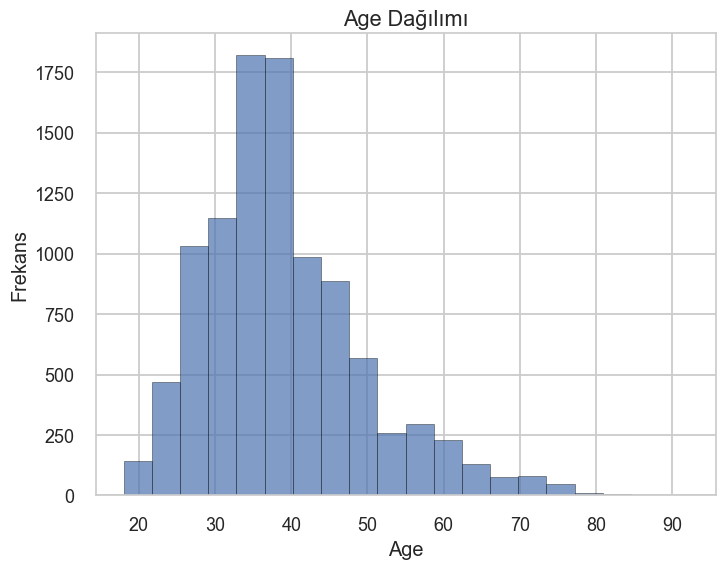

In [77]:
import matplotlib.pyplot as plt

# Age değişkeninin dağılımını görmek için histogram
def plot_age_distribution(df, age_col='Age'):
    plt.figure(figsize=(8, 6))
    plt.hist(df[age_col], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'{age_col} Dağılımı')
    plt.xlabel(age_col)
    plt.ylabel('Frekans')
    plt.grid(True)
    plt.show()

# Örnek kullanım
plot_age_distribution(data, 'Age')


In [78]:
data_1 = data.copy()

In [79]:
# Yaş grupları için sınırlar ve etiketler tanımlayalım
bins = [17, 29, 49, 64, float('inf')] # Sınırlar (17 dahil değil, 29 dahil)
labels = [0, 1, 2, 3] # Atanacak sayısal etiketler

# 'Age' sütununu kullanarak yeni bir 'Age_Group_Label' sütunu oluşturalım
data['Age_Group_Label'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

In [80]:
data = data.drop(columns=['Age'])

In [81]:
data.head()

,CreditScore,Geography,Gender,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Satisfaction_Score,Card_Type,Point_Earned,Age_Group_Label
0,619,France,Female,0.00,1,1,101348.88,1,2,DIAMOND,464,1
1,608,Spain,Female,83807.86,1,1,112542.58,0,3,DIAMOND,456,1
2,502,France,Female,159660.80,3,0,113931.57,1,3,DIAMOND,377,1
3,699,France,Female,0.00,2,0,93826.63,0,5,GOLD,350,1
4,850,Spain,Female,125510.82,1,1,79084.10,0,5,GOLD,425,1


In [82]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_categorical_columns(df):
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns  # Sayısal olmayan sütunları seç
    
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])  # Label encoding işlemi
    
    return df

In [83]:
encode_categorical_columns(data)

,CreditScore,Geography,Gender,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Satisfaction_Score,Card_Type,Point_Earned,Age_Group_Label
0,619,0,0,0.00,1,1,101348.88,1,2,0,464,1
1,608,2,0,83807.86,1,1,112542.58,0,3,0,456,1
2,502,0,0,159660.80,3,0,113931.57,1,3,0,377,1
3,699,0,0,0.00,2,0,93826.63,0,5,1,350,1
4,850,2,0,125510.82,1,1,79084.10,0,5,1,425,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,0.00,2,0,96270.64,0,1,0,300,1
9996,516,0,1,57369.61,1,1,101699.77,0,5,2,771,1
9997,709,0,0,0.00,1,1,42085.58,1,3,3,564,1
9998,772,1,1,75075.31,2,0,92888.52,1,2,1,339,1


In [84]:
# Eğer 'Age_Group_Label' kategorikse, sayısal değerlere dönüştür
data['Age_Group_Label'] = data['Age_Group_Label'].cat.codes


In [85]:
encode_categorical_columns(data_1)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Satisfaction_Score,Card_Type,Point_Earned
0,619,0,0,42,0.00,1,1,101348.88,1,2,0,464
1,608,2,0,41,83807.86,1,1,112542.58,0,3,0,456
2,502,0,0,42,159660.80,3,0,113931.57,1,3,0,377
3,699,0,0,39,0.00,2,0,93826.63,0,5,1,350
4,850,2,0,43,125510.82,1,1,79084.10,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,0.00,2,0,96270.64,0,1,0,300
9996,516,0,1,35,57369.61,1,1,101699.77,0,5,2,771
9997,709,0,0,36,0.00,1,1,42085.58,1,3,3,564
9998,772,1,1,42,75075.31,2,0,92888.52,1,2,1,339


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

def evaluate_model_accuracy(df, target_col='Exited'):
    # Veriyi ayır
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Modeli eğit ve doğruluğu hesapla
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Doğruluk oranını döndür
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model doğruluğu: {accuracy:.4f}")

In [87]:
evaluate_model_accuracy(data_1, target_col='Exited')

Model doğruluğu: 0.8630


In [88]:
evaluate_model_accuracy(data, target_col='Exited')

Model doğruluğu: 0.8360


### LoyaltySegment

In [89]:
df21= df.copy()

In [90]:
def assign_loyalty_segment(row):
    score = 0

    # Sadakat puanını oluştur
    if row['Tenure'] >= 5:
        score += 2
    elif row['Tenure'] >= 2:
        score += 1

    if row['NumOfProducts'] >= 2:
        score += 2
    elif row['NumOfProducts'] == 1:
        score += 1

    if row['IsActiveMember'] == 1:
        score += 2

    if row['Satisfaction_Score'] >= 4:
        score += 2
    elif row['Satisfaction_Score'] == 3:
        score += 1
    if row['Complain'] == 1:
        score -= 2

    # Segment atama
    if score >= 6:
        return 'High Loyalty'
    elif score >= 3:
        return 'Medium Loyalty'
    else:
        return 'Low Loyalty'


In [91]:
df21['LoyaltySegment'] = df21.apply(assign_loyalty_segment, axis=1)


In [92]:
encode_categorical_columns(df21)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,LoyaltySegment
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,1
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,2
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,2
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,300,2
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,564,2
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339,1


In [93]:
df21[['LoyaltySegment', 'Complain']].corr()


,LoyaltySegment,Complain
LoyaltySegment,1.00000,0.12494
Complain,0.12494,1.00000


In [94]:
df21 = df21.drop(columns=['Complain'])

In [95]:
evaluate_model_accuracy(df21, target_col='Exited')

Model doğruluğu: 0.9390


In [96]:
train_and_evaluate_models(df21,'Exited')

C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                       Model  Train Score  Test Score  F1 Score
0              Random Forest     1.000000      0.9260  0.923353
1        Logistic Regression     0.802875      0.8035  0.757828
2  Artificial Neural Network     0.952500      0.9220  0.921462
3                        SVM     0.932250      0.9175  0.913344
4          Gradient Boosting     0.935625      0.9270  0.924028
5                    XGBoost     0.996750      0.9390  0.937254
6              Decision Tree     1.000000      0.8890  0.889728
7                        KNN     0.906500      0.8660  0.853186


,Model,Train Score,Test Score,F1 Score
0,Random Forest,1.000000,0.9260,0.923353
1,Logistic Regression,0.802875,0.8035,0.757828
2,Artificial Neural Network,0.952500,0.9220,0.921462
3,SVM,0.932250,0.9175,0.913344
4,Gradient Boosting,0.935625,0.9270,0.924028
5,XGBoost,0.996750,0.9390,0.937254
6,Decision Tree,1.000000,0.8890,0.889728
7,KNN,0.906500,0.8660,0.853186


Oluşturulan yeni değişken, model doğruluğunu anlamlı şekilde artırmıştır

### RiskSegment

In [97]:
df2 = df.copy()
df2['LoyaltySegment'] = df2.apply(assign_loyalty_segment, axis=1)
encode_categorical_columns(df2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,LoyaltySegment
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,1
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,2
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,2
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,300,2
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,564,2
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339,1


In [98]:
df12 = df2.copy()

In [99]:
def assign_risk_segment(row):
    score = 0

    # Kredi skoru
    if row['CreditScore'] < 500:
        score += 2
    elif row['CreditScore'] < 650:
        score += 1

    # Yaş
    if row['Age'] > 60:
        score += 2
    elif row['Age'] > 45:
        score += 1

    # Bakiye
    if row['Balance'] < 10000:
        score += 2
    elif row['Balance'] < 50000:
        score += 1

    # Ürün sayısı
    if row['NumOfProducts'] == 1:
        score += 1
    elif row['NumOfProducts'] == 0:
        score += 2

    # Kredi kartı
    if row['HasCrCard'] == 0:
        score += 1

    # Şikayet ve memnuniyet
    if row['Complain'] == 1:
        score += 2
    elif row['Satisfaction_Score'] <= 2:
        score += 2
    elif row['Satisfaction_Score'] == 3:
        score += 1

    # Segment atama
    if score >= 7:
        return 'High Risk'
    elif score >= 4:
        return 'Medium Risk'
    else:
        return 'Low Risk'


In [100]:
df12['RiskSegment'] = df12.apply(assign_risk_segment, axis=1)

In [101]:
encode_categorical_columns(df12)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,LoyaltySegment,RiskSegment
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,1,2
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,1,2
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,2,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,2,1
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,300,2,2
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771,0,1
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,564,2,2
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339,1,1


In [102]:
df12[['RiskSegment', 'Complain','Age', 'CreditScore','Balance', 'NumOfProducts','HasCrCard','Satisfaction_Score','LoyaltySegment','Exited']].corr()

,RiskSegment,Complain,Age,CreditScore,Balance,NumOfProducts,HasCrCard,Satisfaction_Score,LoyaltySegment,Exited
RiskSegment,1.000000,0.139835,0.107605,-0.135669,-0.171088,-0.021994,-0.137424,-0.277065,0.124297,0.140272
Complain,0.139835,1.000000,0.283530,-0.027048,0.119124,-0.046357,-0.007095,-0.004799,0.124940,0.995693
Age,0.107605,0.283530,1.000000,-0.003965,0.028308,-0.030680,-0.011721,-0.000876,-0.029497,0.285296
CreditScore,-0.135669,-0.027048,-0.003965,1.000000,0.006268,0.012238,-0.005458,-0.012599,0.001717,-0.026771
Balance,-0.171088,0.119124,0.028308,0.006268,1.000000,-0.304180,-0.014858,-0.002588,0.114457,0.118577
NumOfProducts,-0.021994,-0.046357,-0.030680,0.012238,-0.304180,1.000000,0.003183,-0.011394,-0.185921,-0.047611
HasCrCard,-0.137424,-0.007095,-0.011721,-0.005458,-0.014858,0.003183,1.000000,-0.000212,-0.010245,-0.006976
Satisfaction_Score,-0.277065,-0.004799,-0.000876,-0.012599,-0.002588,-0.011394,-0.000212,1.000000,-0.285803,-0.005849
LoyaltySegment,0.124297,0.124940,-0.029497,0.001717,0.114457,-0.185921,-0.010245,-0.285803,1.000000,0.125137
Exited,0.140272,0.995693,0.285296,-0.026771,0.118577,-0.047611,-0.006976,-0.005849,0.125137,1.000000


In [103]:
df12 = df12.drop(columns=['Complain'])

In [104]:
evaluate_model_accuracy(df12, target_col='Exited')

Model doğruluğu: 0.9540


In [105]:
train_and_evaluate_models(df12,'Exited')

C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                       Model  Train Score  Test Score  F1 Score
0              Random Forest     0.999750      0.9365  0.934267
1        Logistic Regression     0.813250      0.8170  0.778620
2  Artificial Neural Network     0.967500      0.9320  0.931802
3                        SVM     0.938250      0.9210  0.917483
4          Gradient Boosting     0.943750      0.9420  0.940135
5                    XGBoost     0.999500      0.9540  0.953151
6              Decision Tree     1.000000      0.9125  0.912872
7                        KNN     0.920125      0.8870  0.879676


,Model,Train Score,Test Score,F1 Score
0,Random Forest,0.999750,0.9365,0.934267
1,Logistic Regression,0.813250,0.8170,0.778620
2,Artificial Neural Network,0.967500,0.9320,0.931802
3,SVM,0.938250,0.9210,0.917483
4,Gradient Boosting,0.943750,0.9420,0.940135
5,XGBoost,0.999500,0.9540,0.953151
6,Decision Tree,1.000000,0.9125,0.912872
7,KNN,0.920125,0.8870,0.879676


### assign_engagement_level

In [106]:
df14 = df2.copy()

In [107]:
def assign_engagement_level(row):
    score = 0

    if row['IsActiveMember'] == 1:
        score += 2

    if row['NumOfProducts'] >= 2:
        score += 2
    elif row['NumOfProducts'] == 1:
        score += 1

    if row['HasCrCard'] == 1:
        score += 1

    if row['Balance'] > 50000:
        score += 2
    elif row['Balance'] > 10000:
        score += 1

    if row['Complain'] == 1:
        score -= 1  # Şikayet etmesi biraz negatif

    if score >= 6:
        return 'High Engagement'
    elif score >= 3:
        return 'Medium Engagement'
    else:
        return 'Low Engagement'


In [108]:
df14['EngagementLevel'] = df14.apply(assign_engagement_level, axis=1)

In [109]:
df14['RiskSegment'] = df14.apply(assign_risk_segment, axis=1)

In [110]:
encode_categorical_columns(df14)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,LoyaltySegment,EngagementLevel,RiskSegment
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,1,2,2
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,1,2,2
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,2,2,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,2,1,1
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,300,2,2,2
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771,0,0,1
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,564,2,1,2
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339,1,2,1


In [111]:
df14[['EngagementLevel','RiskSegment', 'Complain','IsActiveMember', 'Balance','HasCrCard', 'NumOfProducts','LoyaltySegment','Exited']].corr()

,EngagementLevel,RiskSegment,Complain,IsActiveMember,Balance,HasCrCard,NumOfProducts,LoyaltySegment,Exited
EngagementLevel,1.000000,0.176714,0.105653,-0.397664,-0.252410,-0.101491,0.050712,0.171660,0.106527
RiskSegment,0.176714,1.000000,0.139835,-0.022223,-0.171088,-0.137424,-0.021994,0.124297,0.140272
Complain,0.105653,0.139835,1.000000,-0.154741,0.119124,-0.007095,-0.046357,0.124940,0.995693
IsActiveMember,-0.397664,-0.022223,-0.154741,1.000000,-0.010084,-0.011866,0.009612,-0.362452,-0.156356
Balance,-0.252410,-0.171088,0.119124,-0.010084,1.000000,-0.014858,-0.304180,0.114457,0.118577
HasCrCard,-0.101491,-0.137424,-0.007095,-0.011866,-0.014858,1.000000,0.003183,-0.010245,-0.006976
NumOfProducts,0.050712,-0.021994,-0.046357,0.009612,-0.304180,0.003183,1.000000,-0.185921,-0.047611
LoyaltySegment,0.171660,0.124297,0.124940,-0.362452,0.114457,-0.010245,-0.185921,1.000000,0.125137
Exited,0.106527,0.140272,0.995693,-0.156356,0.118577,-0.006976,-0.047611,0.125137,1.000000


In [112]:
df14 = df14.drop(columns=['Complain'])

In [113]:
evaluate_model_accuracy(df14, target_col='Exited')

Model doğruluğu: 0.9690


In [114]:
train_and_evaluate_models(df14,'Exited')

C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mehdi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mehdi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


                       Model  Train Score  Test Score  F1 Score
0              Random Forest     1.000000      0.9550  0.954120
1        Logistic Regression     0.811625      0.8215  0.786093
2  Artificial Neural Network     0.975875      0.9495  0.949620
3                        SVM     0.954250      0.9435  0.941981
4          Gradient Boosting     0.952125      0.9475  0.946089
5                    XGBoost     0.999750      0.9690  0.968659
6              Decision Tree     1.000000      0.9180  0.918157
7                        KNN     0.935750      0.9115  0.907390


,Model,Train Score,Test Score,F1 Score
0,Random Forest,1.000000,0.9550,0.954120
1,Logistic Regression,0.811625,0.8215,0.786093
2,Artificial Neural Network,0.975875,0.9495,0.949620
3,SVM,0.954250,0.9435,0.941981
4,Gradient Boosting,0.952125,0.9475,0.946089
5,XGBoost,0.999750,0.9690,0.968659
6,Decision Tree,1.000000,0.9180,0.918157
7,KNN,0.935750,0.9115,0.907390


### oluşturulan değişkenlerin görselleştirilmesi

#### LoyaltySegment Dağılımı

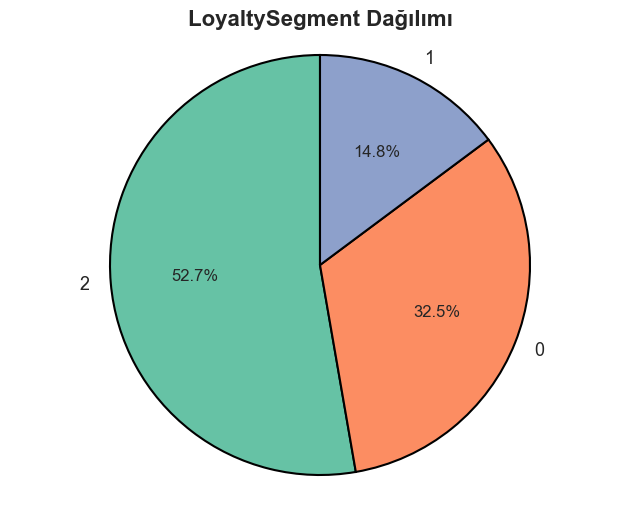

In [115]:
# Coğrafya verisinin frekanslarını al
LoyaltySegment = df14["LoyaltySegment"].value_counts()

# Pasta grafiği çiz
plt.figure(figsize=(8, 6))
plt.pie(LoyaltySegment, labels=LoyaltySegment.index, autopct="%1.1f%%", colors=plt.cm.Set2.colors, startangle=90, 
        wedgeprops={"edgecolor": "Black", "linewidth": 1.5, "linestyle": "solid"})
plt.title("LoyaltySegment Dağılımı", fontsize=16, weight="bold")
plt.axis("equal")  
plt.show()

In [116]:
df14["LoyaltySegment"].value_counts()

LoyaltySegment
2    5273
0    3246
1    1481
Name: count, dtype: int64

#### RiskSegment Dağılımı

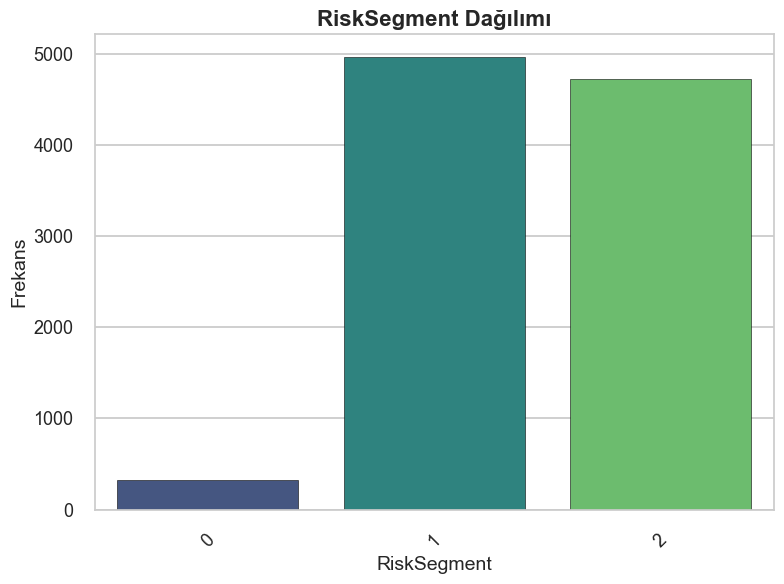

In [117]:
# Tenure değişkeninin frekanslarını al
plt.figure(figsize=(8, 6))
sns.countplot(x="RiskSegment", data=df14, palette="viridis", edgecolor="black")

# Başlık ve etiketleri ekle
plt.title("RiskSegment Dağılımı", fontsize=16, weight="bold")
plt.xlabel("RiskSegment", fontsize=14)
plt.ylabel("Frekans", fontsize=14)

plt.xticks(rotation=45)

# Görseli göster
plt.tight_layout()
plt.show()

In [118]:
df14["RiskSegment"].value_counts()

RiskSegment
1    4961
2    4718
0     321
Name: count, dtype: int64

#### assign_engagement_level Dağılımı

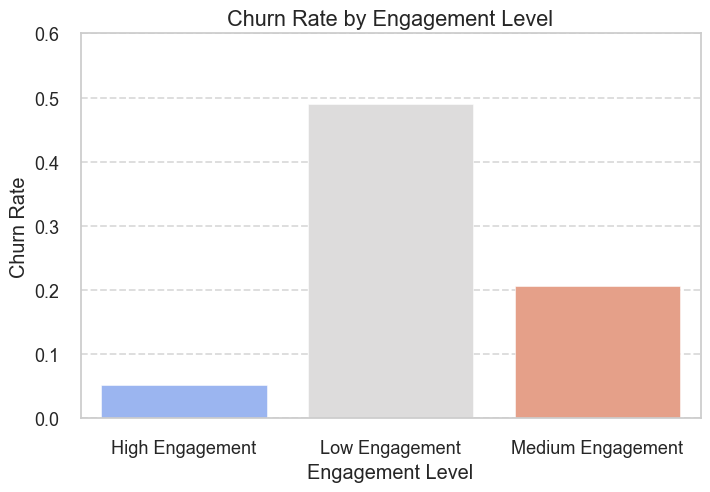

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

engagement_churn = df14.groupby('EngagementLevel')['Exited'].mean().reset_index()
engagement_churn['EngagementLabel'] = engagement_churn['EngagementLevel'].map({
    0: 'High Engagement',
    1: 'Low Engagement',
    2: 'Medium Engagement'
})

plt.figure(figsize=(8, 5))
sns.barplot(data=engagement_churn, x='EngagementLabel', y='Exited', palette='coolwarm')
plt.title('Churn Rate by Engagement Level')
plt.ylabel('Churn Rate')
plt.xlabel('Engagement Level')
plt.ylim(0, 0.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [120]:
df14.groupby('EngagementLevel')['Exited'].mean()


EngagementLevel
0    0.052885
1    0.489637
2    0.205981
Name: Exited, dtype: float64

# Statistical analysis

### Hedef değişkenin Sınıf dengesi

In [121]:
df14.describe()  # Sayısal değişkenler için
df14['Exited'].value_counts(normalize=True)  # Sınıf dengesine bak


Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

### Sayısal Değişkenler ile Exited Arasındaki İlişki

In [122]:
from scipy.stats import ttest_ind

# Sayısal değişkenler listesi
numerical_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point_Earned']

# Sonuçları saklayacağımız bir liste
results = []

# Her bir sayısal değişken için t-testi uygulama
for col in numerical_columns:
    group0 = df14[df14['Exited'] == 0][col]
    group1 = df14[df14['Exited'] == 1][col]
    
    # t-testi
    stat, p = ttest_ind(group0, group1, equal_var=False)
    
    # Sonuçları ekle
    if p < 0.05:
        result = f"{col}: Anlamlı ilişki var (p={p:.4f})"
    else:
        result = f"{col}: Anlamlı ilişki yok (p={p:.4f})"
    
    results.append(result)

# Sonuçları yazdır
for result in results:
    print(result)

CreditScore: Anlamlı ilişki var (p=0.0093)
Age: Anlamlı ilişki var (p=0.0000)
Balance: Anlamlı ilişki var (p=0.0000)
EstimatedSalary: Anlamlı ilişki yok (p=0.2143)
Point_Earned: Anlamlı ilişki yok (p=0.6429)


### Kategorik Değişkenler ile Hedef (Exited) Arasındaki İlişki

In [123]:
from scipy.stats import chi2_contingency

# Kategorik değişkenler listesi
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Card_Type', 'LoyaltySegment', 'RiskSegment', 'EngagementLevel']

# Sonuçları saklayacağımız bir liste
categorical_results = []

# Her bir kategorik değişken için Ki-kare testi uygulama
for col in categorical_columns:
    contingency = pd.crosstab(df14[col], df14['Exited'])  # Çapraz tablo oluştur
    chi2, p, dof, expected = chi2_contingency(contingency)  # Ki-kare testi
    if p < 0.05:
        result = f"{col}: Anlamlı ilişki var (p={p:.4f})"
    else:
        result = f"{col}: Anlamlı ilişki yok (p={p:.4f})"
    
    categorical_results.append(result)

# Sonuçları yazdır
for result in categorical_results:
    print(result)

Geography: Anlamlı ilişki var (p=0.0000)
Gender: Anlamlı ilişki var (p=0.0000)
HasCrCard: Anlamlı ilişki yok (p=0.5026)
IsActiveMember: Anlamlı ilişki var (p=0.0000)
Card_Type: Anlamlı ilişki yok (p=0.1679)
LoyaltySegment: Anlamlı ilişki var (p=0.0000)
RiskSegment: Anlamlı ilişki var (p=0.0000)
EngagementLevel: Anlamlı ilişki var (p=0.0000)


### Multikolinearite Kontrolü (VIF - Variance Inflation Factor)

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Sayısal değişkenlerin VIF hesaplaması
X = df14[numerical_columns]
X = add_constant(X)  # Sabit terim ekle

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

          Variable        VIF
0            const  71.642103
1      CreditScore   1.000059
2              Age   1.000880
3          Balance   1.001225
4  EstimatedSalary   1.000226
5     Point_Earned   1.000220


### Hosmer-Lemeshow Testi

In [125]:
import statsmodels.api as sm
from scipy.stats import chi2
import numpy as np

# Modeli kur
X = df14[numerical_columns + categorical_columns]  # Özellikler
y = df14['Exited']  # Hedef değişken
X = sm.add_constant(X)  # Sabit terim ekle

# Lojistik regresyon modeli
model = sm.Logit(y, X)
result = model.fit()

# Predicted probabilities (tahmin edilen olasılıklar)
pred_probs = result.predict(X)

# Hosmer-Lemeshow Testi
def hosmer_lemeshow_test(y_true, y_pred, num_groups=10):
    # Veriyi num_groups sayıda gruba ayır
    groups = np.array([np.percentile(y_pred, i * 100 / num_groups) for i in range(num_groups + 1)])
    
    observed = []
    expected = []
    for i in range(num_groups):
        # Her grup için gözlemler ve tahmin edilen değerler
        group_indices = np.where((y_pred >= groups[i]) & (y_pred < groups[i + 1]))[0]
        observed.append(np.sum(y_true[group_indices]))
        expected.append(np.sum(y_pred[group_indices]))
    
    # Hosmer-Lemeshow testi
    observed = np.array(observed)
    expected = np.array(expected)
    chi2_stat = np.sum((observed - expected)**2 / expected)
    p_value = chi2.sf(chi2_stat, num_groups - 2)  # Dereceyi num_groups - 2 olarak alıyoruz
    return chi2_stat, p_value

# Testi uygula
chi2_stat, p_value = hosmer_lemeshow_test(y, pred_probs)
print(f"Chi2 Statistic: {chi2_stat}")
print(f"p-value: {p_value}")

Optimization terminated successfully.
         Current function value: 0.424162
         Iterations 7
Chi2 Statistic: 33.07980676803686
p-value: 5.958204617652981e-05


# Model

## Genel Bakış

In [126]:
data = df14.copy()

In [127]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, r2_score, f1_score
import xgboost as xgb

def train_and_evaluate_models(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    models = {
        "Random Forest": RandomForestClassifier() if y.nunique() < 10 else RandomForestRegressor(),
        "Logistic Regression": LogisticRegression() if y.nunique() < 10 else None,
        "Artificial Neural Network": MLPClassifier() if y.nunique() < 10 else MLPRegressor(),
        "SVM": SVC() if y.nunique() < 10 else SVR(),
        "Gradient Boosting": GradientBoostingClassifier() if y.nunique() < 10 else GradientBoostingRegressor(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss') if y.nunique() < 10 else xgb.XGBRegressor(),
        "Decision Tree": DecisionTreeClassifier() if y.nunique() < 10 else DecisionTreeRegressor(),
        "KNN": KNeighborsClassifier() if y.nunique() < 10 else KNeighborsRegressor()
    }
    
    results = []
    
    for name, model in models.items():
        if model is None:
            continue
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        
        if y.nunique() < 10:
            train_score = accuracy_score(y_train, y_train_pred)
            test_score = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
        else:
            train_score = r2_score(y_train, y_train_pred)
            test_score = r2_score(y_test, y_pred)
            f1 = None  # F1 skoru sadece sınıflandırma için geçerlidir
        
        results.append({
            "Model": name,
            "Train Score": train_score,
            "Test Score": test_score,
            "F1 Score": f1
        })
    
    results_df = pd.DataFrame(results)
    print(results_df)
    
    return results_df


In [128]:
train_and_evaluate_models(data,'Exited')

C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                       Model  Train Score  Test Score  F1 Score
0              Random Forest     1.000000      0.9540  0.953151
1        Logistic Regression     0.811625      0.8215  0.786093
2  Artificial Neural Network     0.978750      0.9470  0.946897
3                        SVM     0.954250      0.9435  0.941981
4          Gradient Boosting     0.952125      0.9475  0.946089
5                    XGBoost     0.999750      0.9690  0.968659
6              Decision Tree     1.000000      0.9185  0.918998
7                        KNN     0.935750      0.9115  0.907390


,Model,Train Score,Test Score,F1 Score
0,Random Forest,1.000000,0.9540,0.953151
1,Logistic Regression,0.811625,0.8215,0.786093
2,Artificial Neural Network,0.978750,0.9470,0.946897
3,SVM,0.954250,0.9435,0.941981
4,Gradient Boosting,0.952125,0.9475,0.946089
5,XGBoost,0.999750,0.9690,0.968659
6,Decision Tree,1.000000,0.9185,0.918998
7,KNN,0.935750,0.9115,0.907390


In [129]:
data1 = data.copy()

In [130]:
data1 = data1.drop(columns=["Card_Type", "Point_Earned", "EstimatedSalary"])

In [131]:
data1 = data1.drop(columns=["Gender"])

In [132]:
train_and_evaluate_models(data1,'Exited')

C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                       Model  Train Score  Test Score  F1 Score
0              Random Forest     1.000000      0.9575  0.956876
1        Logistic Regression     0.811250      0.8260  0.789953
2  Artificial Neural Network     0.972875      0.9585  0.958235
3                        SVM     0.957500      0.9515  0.950417
4          Gradient Boosting     0.951500      0.9510  0.949711
5                    XGBoost     0.997625      0.9680  0.967615
6              Decision Tree     1.000000      0.9225  0.923114
7                        KNN     0.952250      0.9410  0.939582


,Model,Train Score,Test Score,F1 Score
0,Random Forest,1.000000,0.9575,0.956876
1,Logistic Regression,0.811250,0.8260,0.789953
2,Artificial Neural Network,0.972875,0.9585,0.958235
3,SVM,0.957500,0.9515,0.950417
4,Gradient Boosting,0.951500,0.9510,0.949711
5,XGBoost,0.997625,0.9680,0.967615
6,Decision Tree,1.000000,0.9225,0.923114
7,KNN,0.952250,0.9410,0.939582


In [133]:
# data1 = data1.drop([ 'CreditScore', 'HasCrCard', 'Geography', 'Tenure'], axis=1)

## Gradient Boosting

In [134]:
data_1 = data1.copy()

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Özellikler ve hedef değişkeni ayır
X = data_1.drop("Exited", axis=1)
y = data_1["Exited"]

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting modelini oluştur
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modeli eğit
gbm.fit(X_train, y_train)

# Tahmin yap
y_pred = gbm.predict(X_test)

# Modelin doğruluğunu hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy:.4f}")


Model Doğruluğu: 0.9510


In [136]:
# Modelin doğruluğunu hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy:.4f}")

# F1 skoru
f1 = f1_score(y_test, y_pred)
print(f"F1 Skoru: {f1:.4f}")

# Test seti boyutu
test_size = len(y_test)
print(f"Test Seti Boyutu: {test_size}")

Model Doğruluğu: 0.9510
F1 Skoru: 0.8668
Test Seti Boyutu: 2000


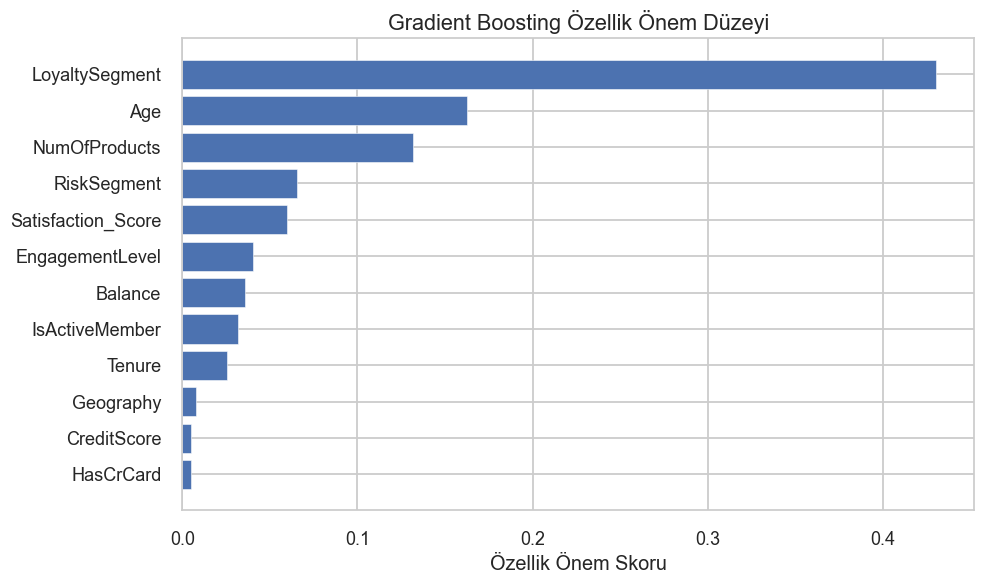

In [137]:
# Feature Importance (Özelliklerin Önemi)
feature_importance = gbm.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Özelliklerin önem sırasını görselleştir
plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Özellik Önem Skoru")
plt.title("Gradient Boosting Özellik Önem Düzeyi")
plt.tight_layout()
plt.show()

In [138]:
# Classification Report
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))



Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1607
           1       0.93      0.81      0.87       393

    accuracy                           0.95      2000
   macro avg       0.94      0.90      0.92      2000
weighted avg       0.95      0.95      0.95      2000



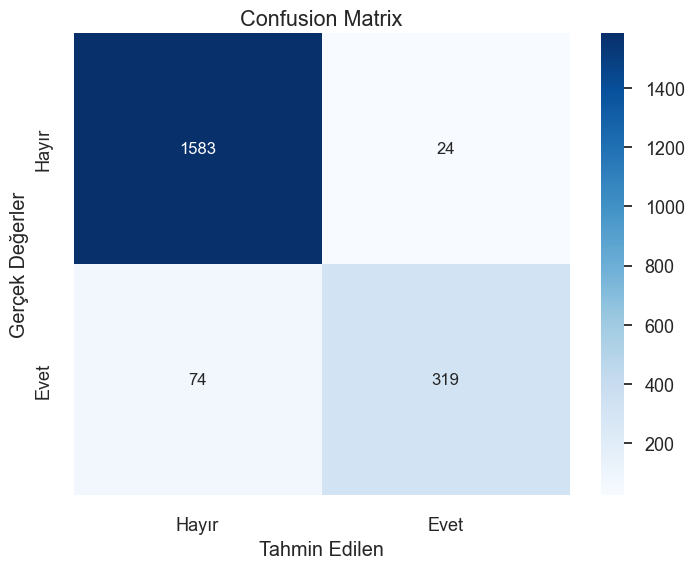

In [139]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hayır', 'Evet'], yticklabels=['Hayır', 'Evet'])
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değerler')
plt.show()


### simülasyon

In [140]:
data_real = data_1.copy()

In [155]:
data_real.Exited.value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [141]:
from sklearn.utils import resample

# Azınlık ve çoğunluk sınıflarını ayıralım
minority_class_real = data_real[data_real['Exited'] == 1]
majority_class_real = data_real[data_real['Exited'] == 0]

# Azınlık sınıfını çoğaltma işlemi
minority_upsampled_real = resample(minority_class_real, 
                                   replace=True,     # Veriler tekrarlanabilir
                                   n_samples=7962,   # Eşit sayıya ulaşana kadar çoğalt
                                   random_state=42)

# Yeni dengeyi oluşturma
balanced_data_real = pd.concat([majority_class_real, minority_upsampled_real])

# Yeni sınıf dağılımı ve örnek verinin ilk birkaç satırı
balanced_data_real['Exited'].value_counts(), balanced_data_real.head()

(Exited
 0    7962
 1    7962
 Name: count, dtype: int64,
    CreditScore  Geography  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 1          608          2   41       1   83807.86              1          0   
 3          699          0   39       1       0.00              2          0   
 4          850          2   43       2  125510.82              1          1   
 6          822          0   50       7       0.00              2          1   
 8          501          0   44       4  142051.07              2          0   
 
    IsActiveMember  Exited  Satisfaction_Score  LoyaltySegment  \
 1               1       0                   3               1   
 3               0       0                   5               2   
 4               1       0                   5               0   
 6               1       0                   2               0   
 8               1       0                   3               0   
 
    EngagementLevel  RiskSegment  
 1                2        

In [142]:
balanced_data_real.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15924 entries, 1 to 3935
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         15924 non-null  int64  
 1   Geography           15924 non-null  int32  
 2   Age                 15924 non-null  int64  
 3   Tenure              15924 non-null  int64  
 4   Balance             15924 non-null  float64
 5   NumOfProducts       15924 non-null  int64  
 6   HasCrCard           15924 non-null  int64  
 7   IsActiveMember      15924 non-null  int64  
 8   Exited              15924 non-null  int64  
 9   Satisfaction_Score  15924 non-null  int64  
 10  LoyaltySegment      15924 non-null  int32  
 11  EngagementLevel     15924 non-null  int32  
 12  RiskSegment         15924 non-null  int32  
dtypes: float64(1), int32(4), int64(8)
memory usage: 1.5 MB


In [143]:
balanced_data_real.Exited.value_counts()

Exited
0    7962
1    7962
Name: count, dtype: int64

In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Özellikler ve hedef değişkeni ayır
X = balanced_data_real.drop("Exited", axis=1)
y = balanced_data_real["Exited"]

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting modelini oluştur
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modeli eğit
gbm.fit(X_train, y_train)

# Tahmin yap
y_pred = gbm.predict(X_test)

# Modelin doğruluğunu hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy:.4f}")


Model Doğruluğu: 0.9413


In [145]:
# Modelin doğruluğunu hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy:.4f}")

# F1 skoru
f1 = f1_score(y_test, y_pred)
print(f"F1 Skoru: {f1:.4f}")

# Test seti boyutu
test_size = len(y_test)
print(f"Test Seti Boyutu: {test_size}")

Model Doğruluğu: 0.9413
F1 Skoru: 0.9405
Test Seti Boyutu: 3185


In [146]:
# Classification Report
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))



Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1620
           1       0.94      0.95      0.94      1565

    accuracy                           0.94      3185
   macro avg       0.94      0.94      0.94      3185
weighted avg       0.94      0.94      0.94      3185



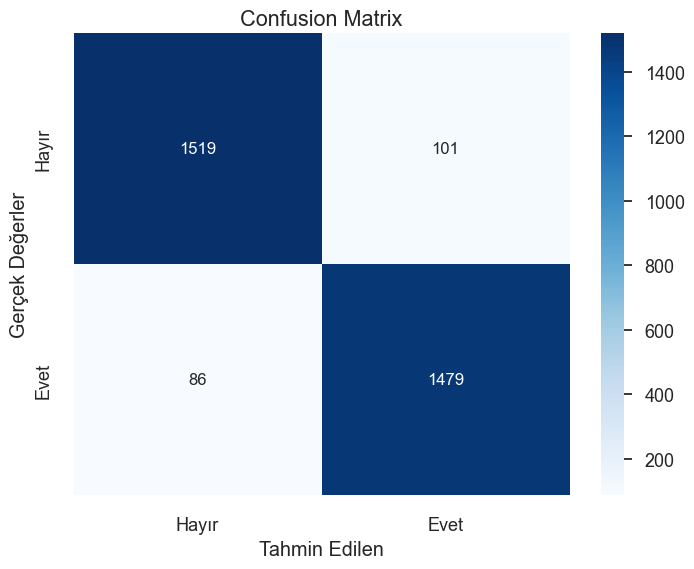

In [147]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hayır', 'Evet'], yticklabels=['Hayır', 'Evet'])
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değerler')
plt.show()


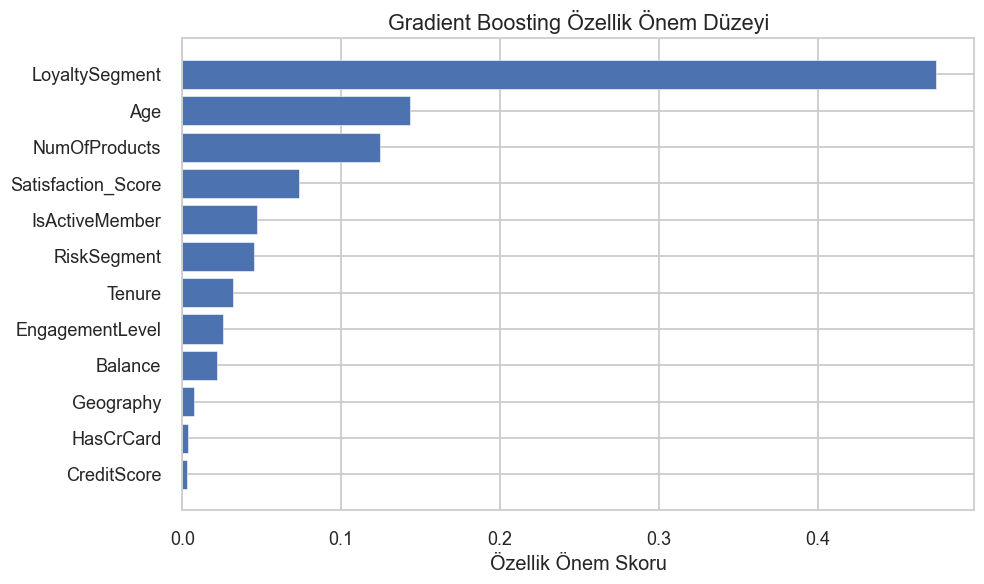

In [148]:
# Feature Importance (Özelliklerin Önemi)
feature_importance = gbm.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Özelliklerin önem sırasını görselleştir
plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Özellik Önem Skoru")
plt.title("Gradient Boosting Özellik Önem Düzeyi")
plt.tight_layout()
plt.show()

AUC: 0.9834


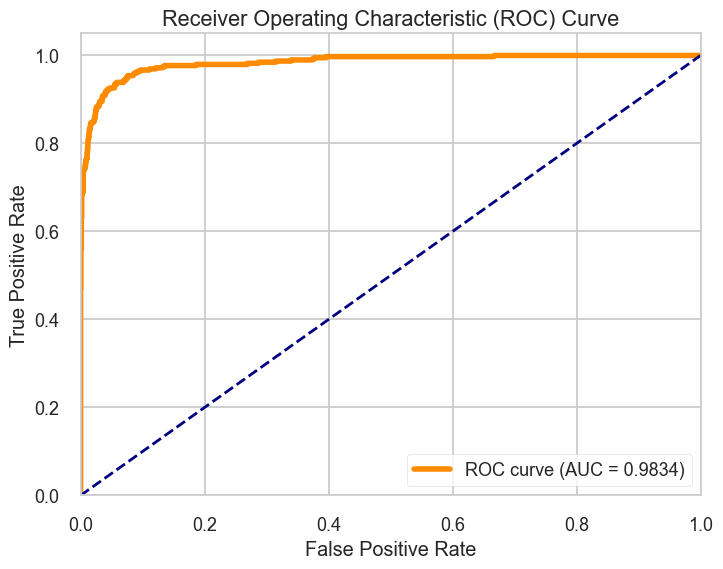

In [154]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Modelin tahmin ettiği sınıf olasılıkları (pozitif sınıf için)
y_prob = gbm.predict_proba(X_test)[:, 1]  # Pozitif sınıfın (Exited=1) olasılıkları

# ROC eğrisini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC değerini hesapla
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=4, label=f'ROC curve (AUC = {roc_auc:.4f})')  # linewidth=4 ile kalınlaştırdık
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Artificial Neural Network

In [150]:
data_2 = data1.copy()

In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Özellikler ve hedef değişkeni ayır
X = data_1.drop("Exited", axis=1)
y = data_1["Exited"]

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli oluştur
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification için sigmoid

# Modeli derle
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Modeli test et
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


C:\Users\mehdi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6630 - loss: 0.5999 - val_accuracy: 0.8213 - val_loss: 0.3940
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8328 - loss: 0.3763 - val_accuracy: 0.8706 - val_loss: 0.3126
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8799 - loss: 0.2960 - val_accuracy: 0.9031 - val_loss: 0.2436
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9176 - loss: 0.2228 - val_accuracy: 0.9275 - val_loss: 0.1985
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9321 - loss: 0.1825 - val_accuracy: 0.9381 - val_loss: 0.1740
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9382 - loss: 0.1671 - val_accuracy: 0.9481 - val_loss: 0.1646
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9348 - loss: 0.1674 - val_accuracy: 0.9469 - val_loss: 0.1547
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9412 - loss: 0.1477 - val_accuracy: 

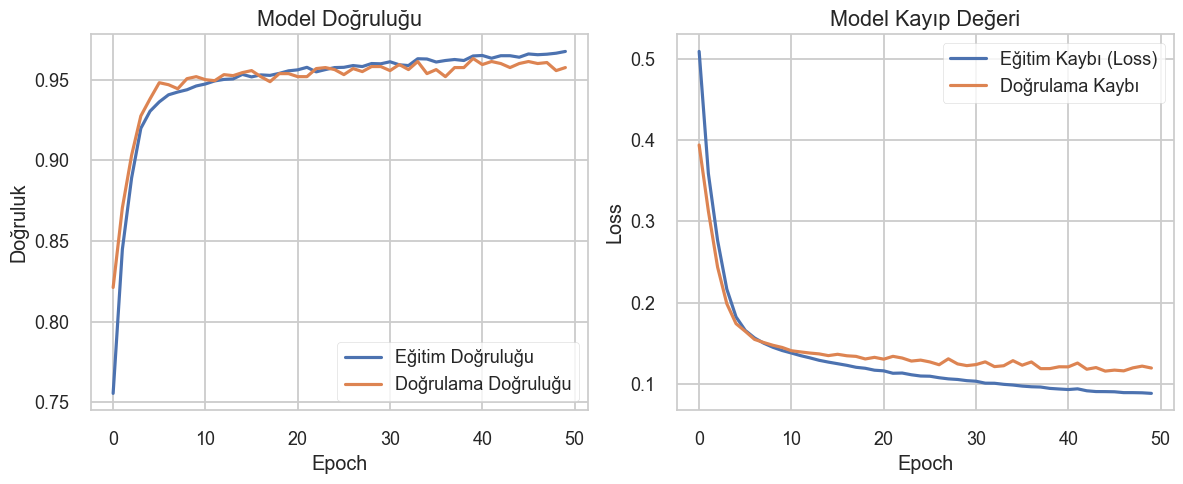

In [152]:
import matplotlib.pyplot as plt

# Accuracy grafiği
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Loss grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı (Loss)')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kayıp Değeri')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
